<a href="https://colab.research.google.com/github/vanshika-hgnis/AI-Env-Impact-Analyser/blob/main/DMT_Student_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# # /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org

# %cd /content
# !mkdir data
# !unzip "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org.zip" -d data

In [ ]:
!nvidia-smi

Mon Mar 31 23:31:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
import os
import yaml
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2

In [ ]:
yaml_path = '/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml'
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)
    class_names = data_config['names']


In [ ]:

classes = data_config['names']
train_dir = '/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/train'  # Update path
valid_dir = '/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid'
test_dir = '/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test'

# Evaluating Datasets


=== DATASET SUMMARY ===
Total Images: 4476
Train: 4395
Validation: 0
Test: 81

=== CLASS DISTRIBUTION ===
          Class  Count
0      eye_move    839
1  looking_side    949
2     hand_move   1006
3    mobile_use    894
4    mouth_open    719


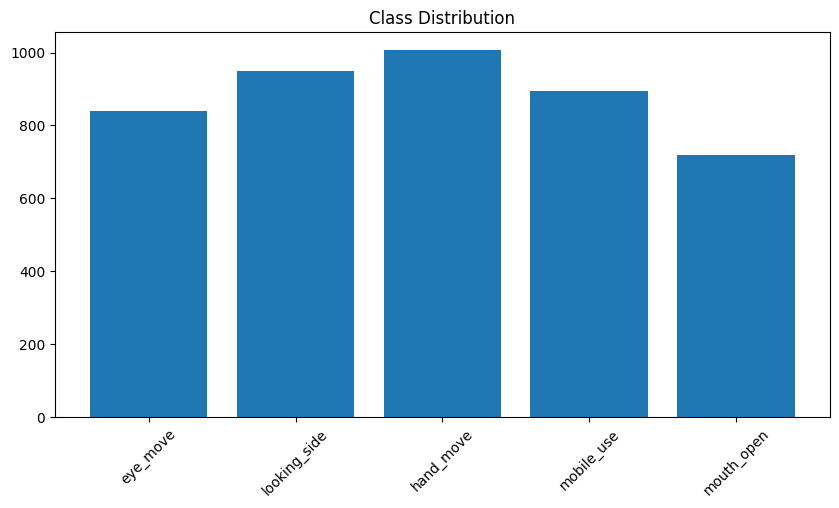


=== IMAGE DIMENSIONS ===
Average Width: 640.0px
Average Height: 640.0px
Min Size: [640 640]
Max Size: [640 640]


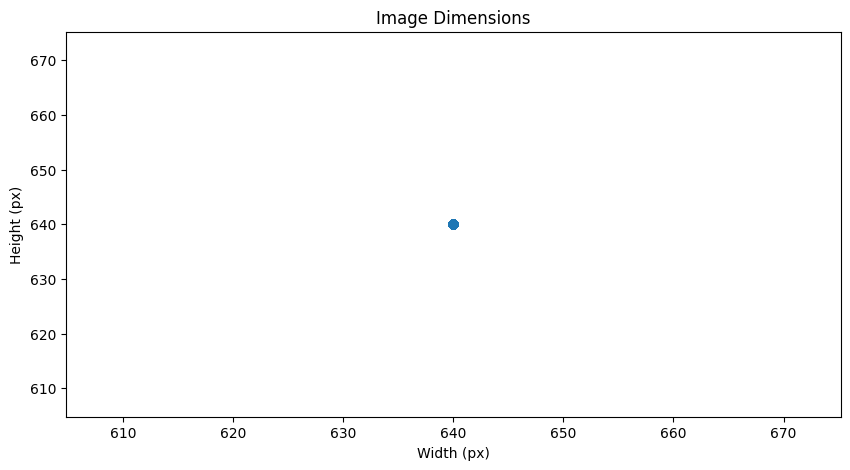


=== BOUNDING BOX SIZES ===

eye_move:
  Avg Width: 165.2px
  Avg Height: 306.6px
  Area Ratio: 12.46%

looking_side:
  Avg Width: 443.8px
  Avg Height: 531.6px
  Area Ratio: 58.06%

hand_move:
  Avg Width: 275.6px
  Avg Height: 339.3px
  Area Ratio: 23.56%

mobile_use:
  Avg Width: 146.0px
  Avg Height: 73.5px
  Area Ratio: 2.66%

mouth_open:
  Avg Width: 92.7px
  Avg Height: 82.3px
  Area Ratio: 1.87%


In [ ]:
import os
import yaml
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Configuration
DATASET_PATH = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org"  # Root folder of your dataset
CLASSES_YAML = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml"  # Path to your dataset YAML file

def analyze_dataset():
    # Load class names from YAML
    with open(os.path.join(DATASET_PATH, CLASSES_YAML), 'r') as f:
        data = yaml.safe_load(f)
    class_names = data['names']

    # Initialize counters
    stats = {
        'image_counts': defaultdict(int),
        'class_counts': defaultdict(int),
        'image_sizes': [],
        'aspect_ratios': [],
        'bbox_sizes': defaultdict(list),
        'split_counts': {'train': 0, 'val': 0, 'test': 0}
    }

    # Analyze each split
    for split in ['train', 'val', 'test']:
        image_dir = os.path.join(DATASET_PATH, split, 'images')
        label_dir = os.path.join(DATASET_PATH, split, 'labels')

        if not os.path.exists(image_dir):
            continue

        for img_file in os.listdir(image_dir):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                stats['split_counts'][split] += 1

                # Get image dimensions
                img_path = os.path.join(image_dir, img_file)
                img = cv2.imread(img_path)
                h, w = img.shape[:2]
                stats['image_sizes'].append((w, h))
                stats['aspect_ratios'].append(w / h)

                # Parse labels
                txt_file = os.path.splitext(img_file)[0] + '.txt'
                txt_path = os.path.join(label_dir, txt_file)

                if os.path.exists(txt_path):
                    with open(txt_path, 'r') as f:
                        lines = f.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            if len(parts) >= 5:
                                class_id = int(parts[0])
                                stats['class_counts'][class_id] += 1

                                # Get bbox dimensions (normalized YOLO format)
                                _, x_center, y_center, bw, bh = map(float, parts)
                                stats['bbox_sizes'][class_id].append((bw * w, bh * h))

    return class_names, stats

def visualize_stats(class_names, stats):
    # 1. Dataset Summary
    print("\n=== DATASET SUMMARY ===")
    print(f"Total Images: {sum(stats['split_counts'].values())}")
    print(f"Train: {stats['split_counts']['train']}")
    print(f"Validation: {stats['split_counts']['val']}")
    print(f"Test: {stats['split_counts']['test']}")

    # 2. Class Distribution
    print("\n=== CLASS DISTRIBUTION ===")
    class_dist = pd.DataFrame({
        'Class': [class_names[i] for i in stats['class_counts'].keys()],
        'Count': list(stats['class_counts'].values())
    })
    print(class_dist)

    plt.figure(figsize=(10, 5))
    plt.bar(class_dist['Class'], class_dist['Count'])
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Image Sizes Analysis
    sizes = np.array(stats['image_sizes'])
    print("\n=== IMAGE DIMENSIONS ===")
    print(f"Average Width: {np.mean(sizes[:, 0]):.1f}px")
    print(f"Average Height: {np.mean(sizes[:, 1]):.1f}px")
    print(f"Min Size: {sizes.min(axis=0)}")
    print(f"Max Size: {sizes.max(axis=0)}")

    plt.figure(figsize=(10, 5))
    plt.scatter(sizes[:, 0], sizes[:, 1], alpha=0.5)
    plt.title('Image Dimensions')
    plt.xlabel('Width (px)')
    plt.ylabel('Height (px)')
    plt.show()

    # 4. Bounding Box Sizes
    print("\n=== BOUNDING BOX SIZES ===")
    for class_id, boxes in stats['bbox_sizes'].items():
        boxes = np.array(boxes)
        print(f"\n{class_names[class_id]}:")
        print(f"  Avg Width: {np.mean(boxes[:, 0]):.1f}px")
        print(f"  Avg Height: {np.mean(boxes[:, 1]):.1f}px")
        print(f"  Area Ratio: {(np.mean(boxes[:, 0] * boxes[:, 1]) / (sizes[0][0] * sizes[0][1])):.2%}")

if __name__ == "__main__":
    class_names, stats = analyze_dataset()
    visualize_stats(class_names, stats)

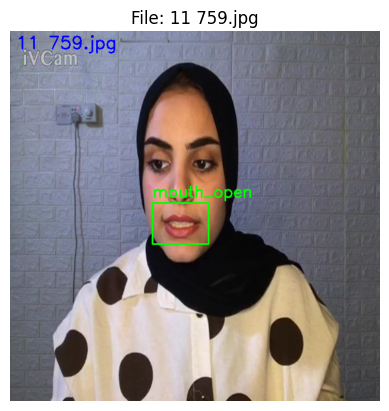

In [ ]:

# Define the paths to the folders
data_dir = r"/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid"
images_dir = os.path.join(data_dir, 'images')
labels_dir = os.path.join(data_dir, 'labels')

# Get all image files and annotation files
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Load class names from YAML
with open('/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml', 'r') as f:
    data_config = yaml.safe_load(f)
class_names = data_config['names']

# Helper function to read annotations and return bounding boxes with class labels
def read_annotations(label_file):
    bounding_boxes = []
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id, x_center, y_center, width, height = map(float, parts)
                class_name = class_names[int(class_id)]  # Map class ID to behavior name
                bounding_boxes.append((class_name, x_center, y_center, width, height))
    return bounding_boxes

# Helper function to overlay bounding boxes and behavior labels on the image
def draw_bounding_boxes(image, bboxes, filename):
    h, w, _ = image.shape
    for bbox in bboxes:
        class_name, x_center, y_center, box_w, box_h = bbox
        # Convert YOLO format (center x, center y, width, height) to (x_min, y_min, x_max, y_max)
        x_min = int((x_center - box_w / 2) * w)
        y_min = int((y_center - box_h / 2) * h)
        x_max = int((x_center + box_w / 2) * w)
        y_max = int((y_center + box_h / 2) * h)
        # Draw the bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        # Put the behavior label on the bounding box
        cv2.putText(image, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Put the filename on the image
    cv2.putText(image, filename, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return image

# Function to display images with annotations
def display_images_with_bboxes():
    index = 0

    def update_image(index):
        # Get current image and corresponding annotation file
        image_file = image_files[index]
        image_path = os.path.join(images_dir, image_file)
        label_file = os.path.join(labels_dir, os.path.splitext(image_file)[0] + '.txt')

        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Could not read image {image_file}")
            return

        # Check if corresponding label file exists
        if os.path.exists(label_file):
            bounding_boxes = read_annotations(label_file)
            image_with_boxes = draw_bounding_boxes(image.copy(), bounding_boxes, image_file)
        else:
            image_with_boxes = image.copy()
            cv2.putText(image_with_boxes, "No Annotations", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Convert image color from BGR to RGB for displaying in matplotlib
        image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

        # Clear the previous plot and display the updated image
        plt.clf()
        plt.imshow(image_with_boxes_rgb)
        plt.title(f"File: {image_file}")
        plt.axis('off')
        plt.draw()

    def on_key(event):
        nonlocal index
        if event.key == 'right':
            index = (index + 1) % len(image_files)
        elif event.key == 'left':
            index = (index - 1) % len(image_files)
        update_image(index)

    # Initial image display
    update_image(index)

    # Connect key press events to navigate through the images
    plt.gcf().canvas.mpl_connect('key_press_event', on_key)
    plt.show()

# Run the display function
display_images_with_bboxes()

# Creating Train Set - Image,Bounding Box,Class Labels

In [ ]:
import os
import pandas as pd
import yaml

# Define paths
data_dir = r"/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/train"
images_dir = os.path.join(data_dir, 'images')
labels_dir = os.path.join(data_dir, 'labels')

# Load class names from YAML
with open('/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml', 'r') as f:
    data_config = yaml.safe_load(f)
class_names = data_config['names']

# Helper function to read annotations and return bounding boxes with class labels
def read_annotations(label_file):
    bounding_boxes = []
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id, x_center, y_center, width, height = map(float, parts)
                class_name = class_names[int(class_id)]  # Map class ID to behavior name
                bounding_boxes.append((class_name, x_center, y_center, width, height))
    return bounding_boxes

# Create a list to store dataset rows
dataset_rows = []

# Iterate through all images and annotations
for image_file in os.listdir(images_dir):
    if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(images_dir, image_file)
        label_file = os.path.join(labels_dir, os.path.splitext(image_file)[0] + '.txt')

        # Read bounding boxes and class labels
        if os.path.exists(label_file):
            bboxes = read_annotations(label_file)
            class_labels = [bbox[0] for bbox in bboxes]  # Extract class names
            bbox_coords = [bbox[1:] for bbox in bboxes]  # Extract bounding box coordinates
        else:
            bboxes = []
            class_labels = []
            bbox_coords = []

        # Add row to dataset
        dataset_rows.append({
            'image_path': image_path,
            'bboxes': bbox_coords,
            'class_labels': class_labels
        })

# Create DataFrame
dataset_df = pd.DataFrame(dataset_rows)

# Display the first few rows of the dataset
print(dataset_df.head())

                                          image_path  \
0  /content/drive/MyDrive/data/DataMining/dataset...   
1  /content/drive/MyDrive/data/DataMining/dataset...   
2  /content/drive/MyDrive/data/DataMining/dataset...   
3  /content/drive/MyDrive/data/DataMining/dataset...   
4  /content/drive/MyDrive/data/DataMining/dataset...   

                                       bboxes  class_labels  
0   [(0.42652, 0.433277, 0.224662, 0.074324)]  [mobile_use]  
1  [(0.429054, 0.436655, 0.195946, 0.081081)]  [mobile_use]  
2  [(0.389358, 0.419764, 0.248311, 0.060811)]  [mobile_use]  
3  [(0.416385, 0.429899, 0.197635, 0.091216)]  [mobile_use]  
4  [(0.391892, 0.425676, 0.277027, 0.096284)]  [mobile_use]  


### Visualizing the potential images(with bouding box and the class labels)

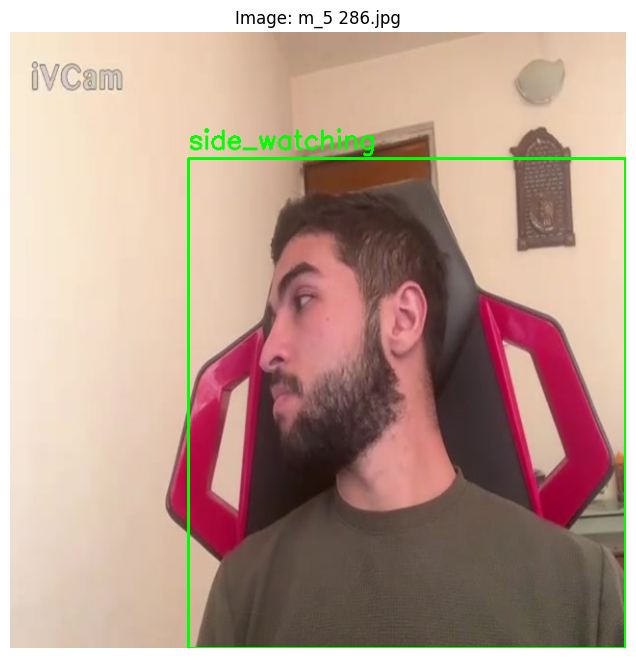

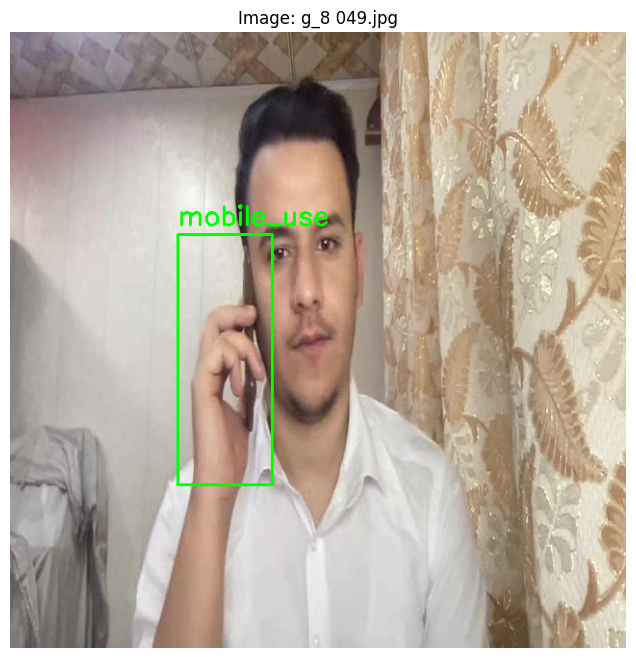

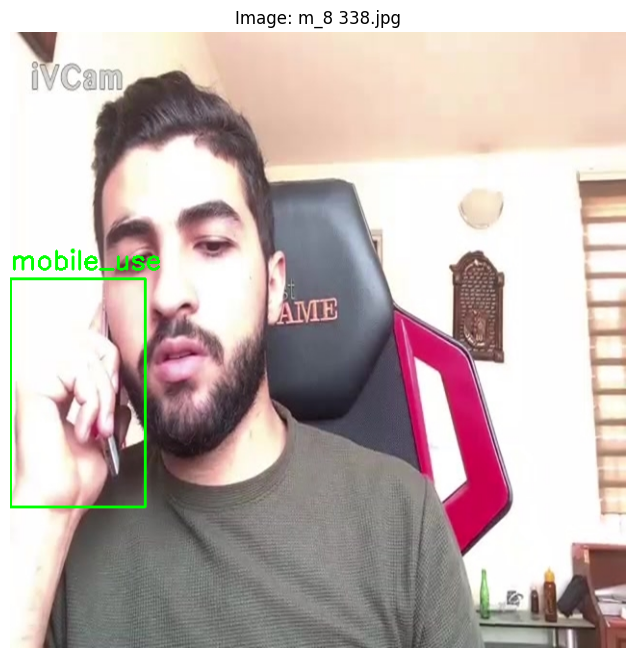

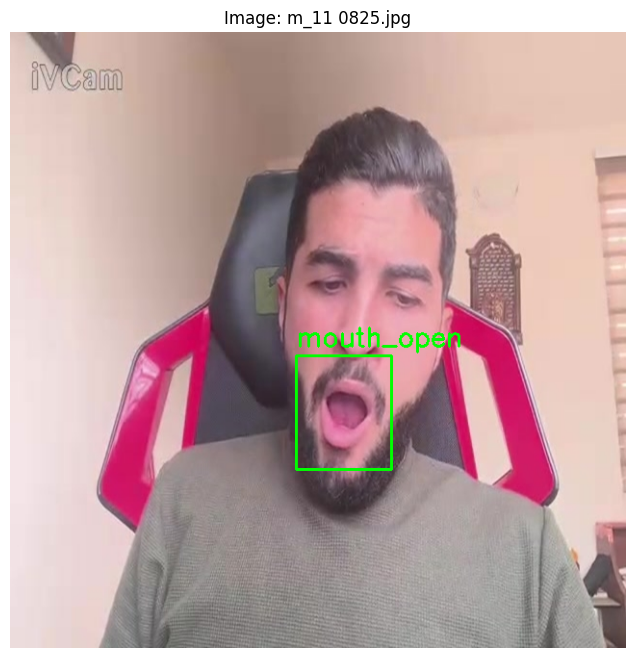

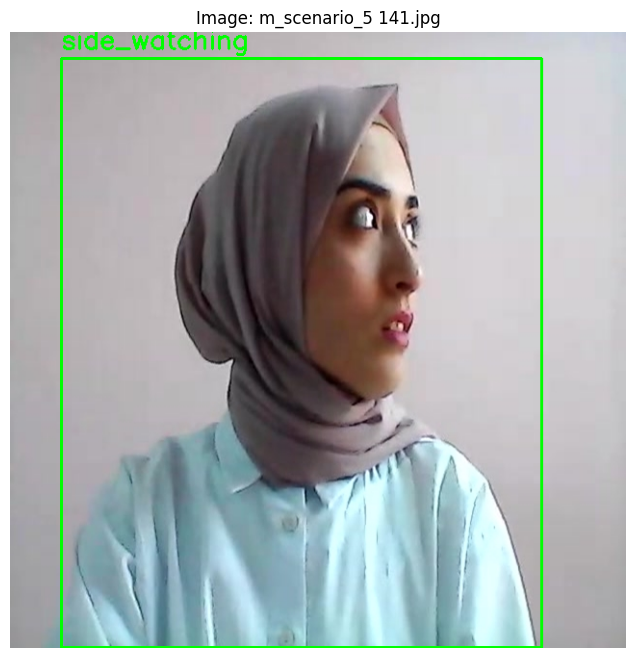

In [ ]:
import cv2
import matplotlib.pyplot as plt

def visualize_dataset(df, num_samples=5):
    for _, row in df.sample(num_samples).iterrows():
        image_path = row['image_path']
        bboxes = row['bboxes']
        class_labels = row['class_labels']

        # Read the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape

        # Draw bounding boxes and labels
        for bbox, label in zip(bboxes, class_labels):
            x_center, y_center, box_w, box_h = bbox
            x_min = int((x_center - box_w / 2) * w)
            y_min = int((y_center - box_h / 2) * h)
            x_max = int((x_center + box_w / 2) * w)
            y_max = int((y_center + box_h / 2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display the image
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.title(f"Image: {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()

# Visualize 5 random samples
visualize_dataset(dataset_df, num_samples=5)

In [ ]:
dataset_df.to_csv('/content/drive/MyDrive/data/DataMining/train_dataset.csv', index=False)

# Training YOLO Model - 10 epochs

In [ ]:
from ultralytics import YOLO

# 1. Load a pretrained YOLOv8 model (choose one: yolov8n, yolov8s, yolov8m, yolov8l, yolov8x)
model = YOLO('yolov8n.pt')  # 'n' is the smallest, fastest version

# 2. Train the model
results = model.train(
    data='/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml',  # path to your data.yaml
    epochs=10,        # number of training epochs
    batch=8,          # batch size (adjust based on GPU RAM)
    imgsz=640,        # image size
    name='student_behavior_model'  # results will be saved in runs/detect/student_behavior_model
)


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=student_behavior_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

train: Scanning /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/train/labels.cache... 4395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4395/4395 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels.cache... 1099 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1099/1099 [00:00<?, ?it/s]


Plotting labels to runs/detect/student_behavior_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/student_behavior_model2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.13G      1.373      2.668      1.682          3        640: 100%|██████████| 550/550 [02:26<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:19<00:00,  3.46it/s]


                   all       1099       1104      0.865      0.847      0.919      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       1.4G      1.202      1.314      1.475          3        640: 100%|██████████| 550/550 [01:52<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.30it/s]


                   all       1099       1104      0.941      0.919      0.972      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.41G      1.165     0.9294      1.437          3        640: 100%|██████████| 550/550 [01:51<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.19it/s]


                   all       1099       1104      0.949      0.905      0.967      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.42G      1.114     0.7583      1.395          3        640: 100%|██████████| 550/550 [02:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.42it/s]

                   all       1099       1104      0.964      0.979      0.986      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.42G       1.06     0.6601      1.348          3        640: 100%|██████████| 550/550 [01:53<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.42it/s]

                   all       1099       1104      0.972      0.964      0.987      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.42G      1.008     0.5809      1.305          3        640: 100%|██████████| 550/550 [01:52<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.08it/s]

                   all       1099       1104      0.978      0.987       0.99      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.42G      0.982     0.5303      1.279          3        640: 100%|██████████| 550/550 [01:50<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.34it/s]

                   all       1099       1104       0.99      0.993      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.42G     0.9441     0.4865      1.247          3        640: 100%|██████████| 550/550 [01:50<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.40it/s]

                   all       1099       1104      0.992      0.997      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.42G     0.8993     0.4517      1.209          3        640: 100%|██████████| 550/550 [01:50<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.40it/s]

                   all       1099       1104      0.994      0.995      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.42G     0.8661     0.4205      1.187          3        640: 100%|██████████| 550/550 [01:55<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.31it/s]

                   all       1099       1104      0.995      0.996      0.995       0.78



10 epochs completed in 0.373 hours.
Optimizer stripped from runs/detect/student_behavior_model2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/student_behavior_model2/weights/best.pt, 6.2MB

Validating runs/detect/student_behavior_model2/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.20it/s]


                   all       1099       1104      0.995      0.996      0.995       0.78
            mobile_use        265        265      0.992      0.996      0.995      0.729
             hand_move        218        223      0.988      0.991      0.994      0.787
              eye_move        204        204      0.998      0.995      0.995      0.749
          looking_side        230        230          1          1      0.995      0.901
            mouth_open        182        182      0.997          1      0.995      0.731
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/student_behavior_model2


# Test Model

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/runs/detect/student_behavior_model2/weights/best.pt')  # Path to your best weights

# Validate on test set
metrics = model.val(
    data='/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml',
    split='test',  # or 'val'
    imgsz=640,
    batch=8,
    name='val_student_behavior'
)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels... 0 images, 81 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:55<00:00,  1.46it/s]

val: WARNING ⚠️ No labels found in /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core

                   all         81          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val_student_behavior


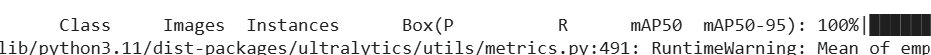

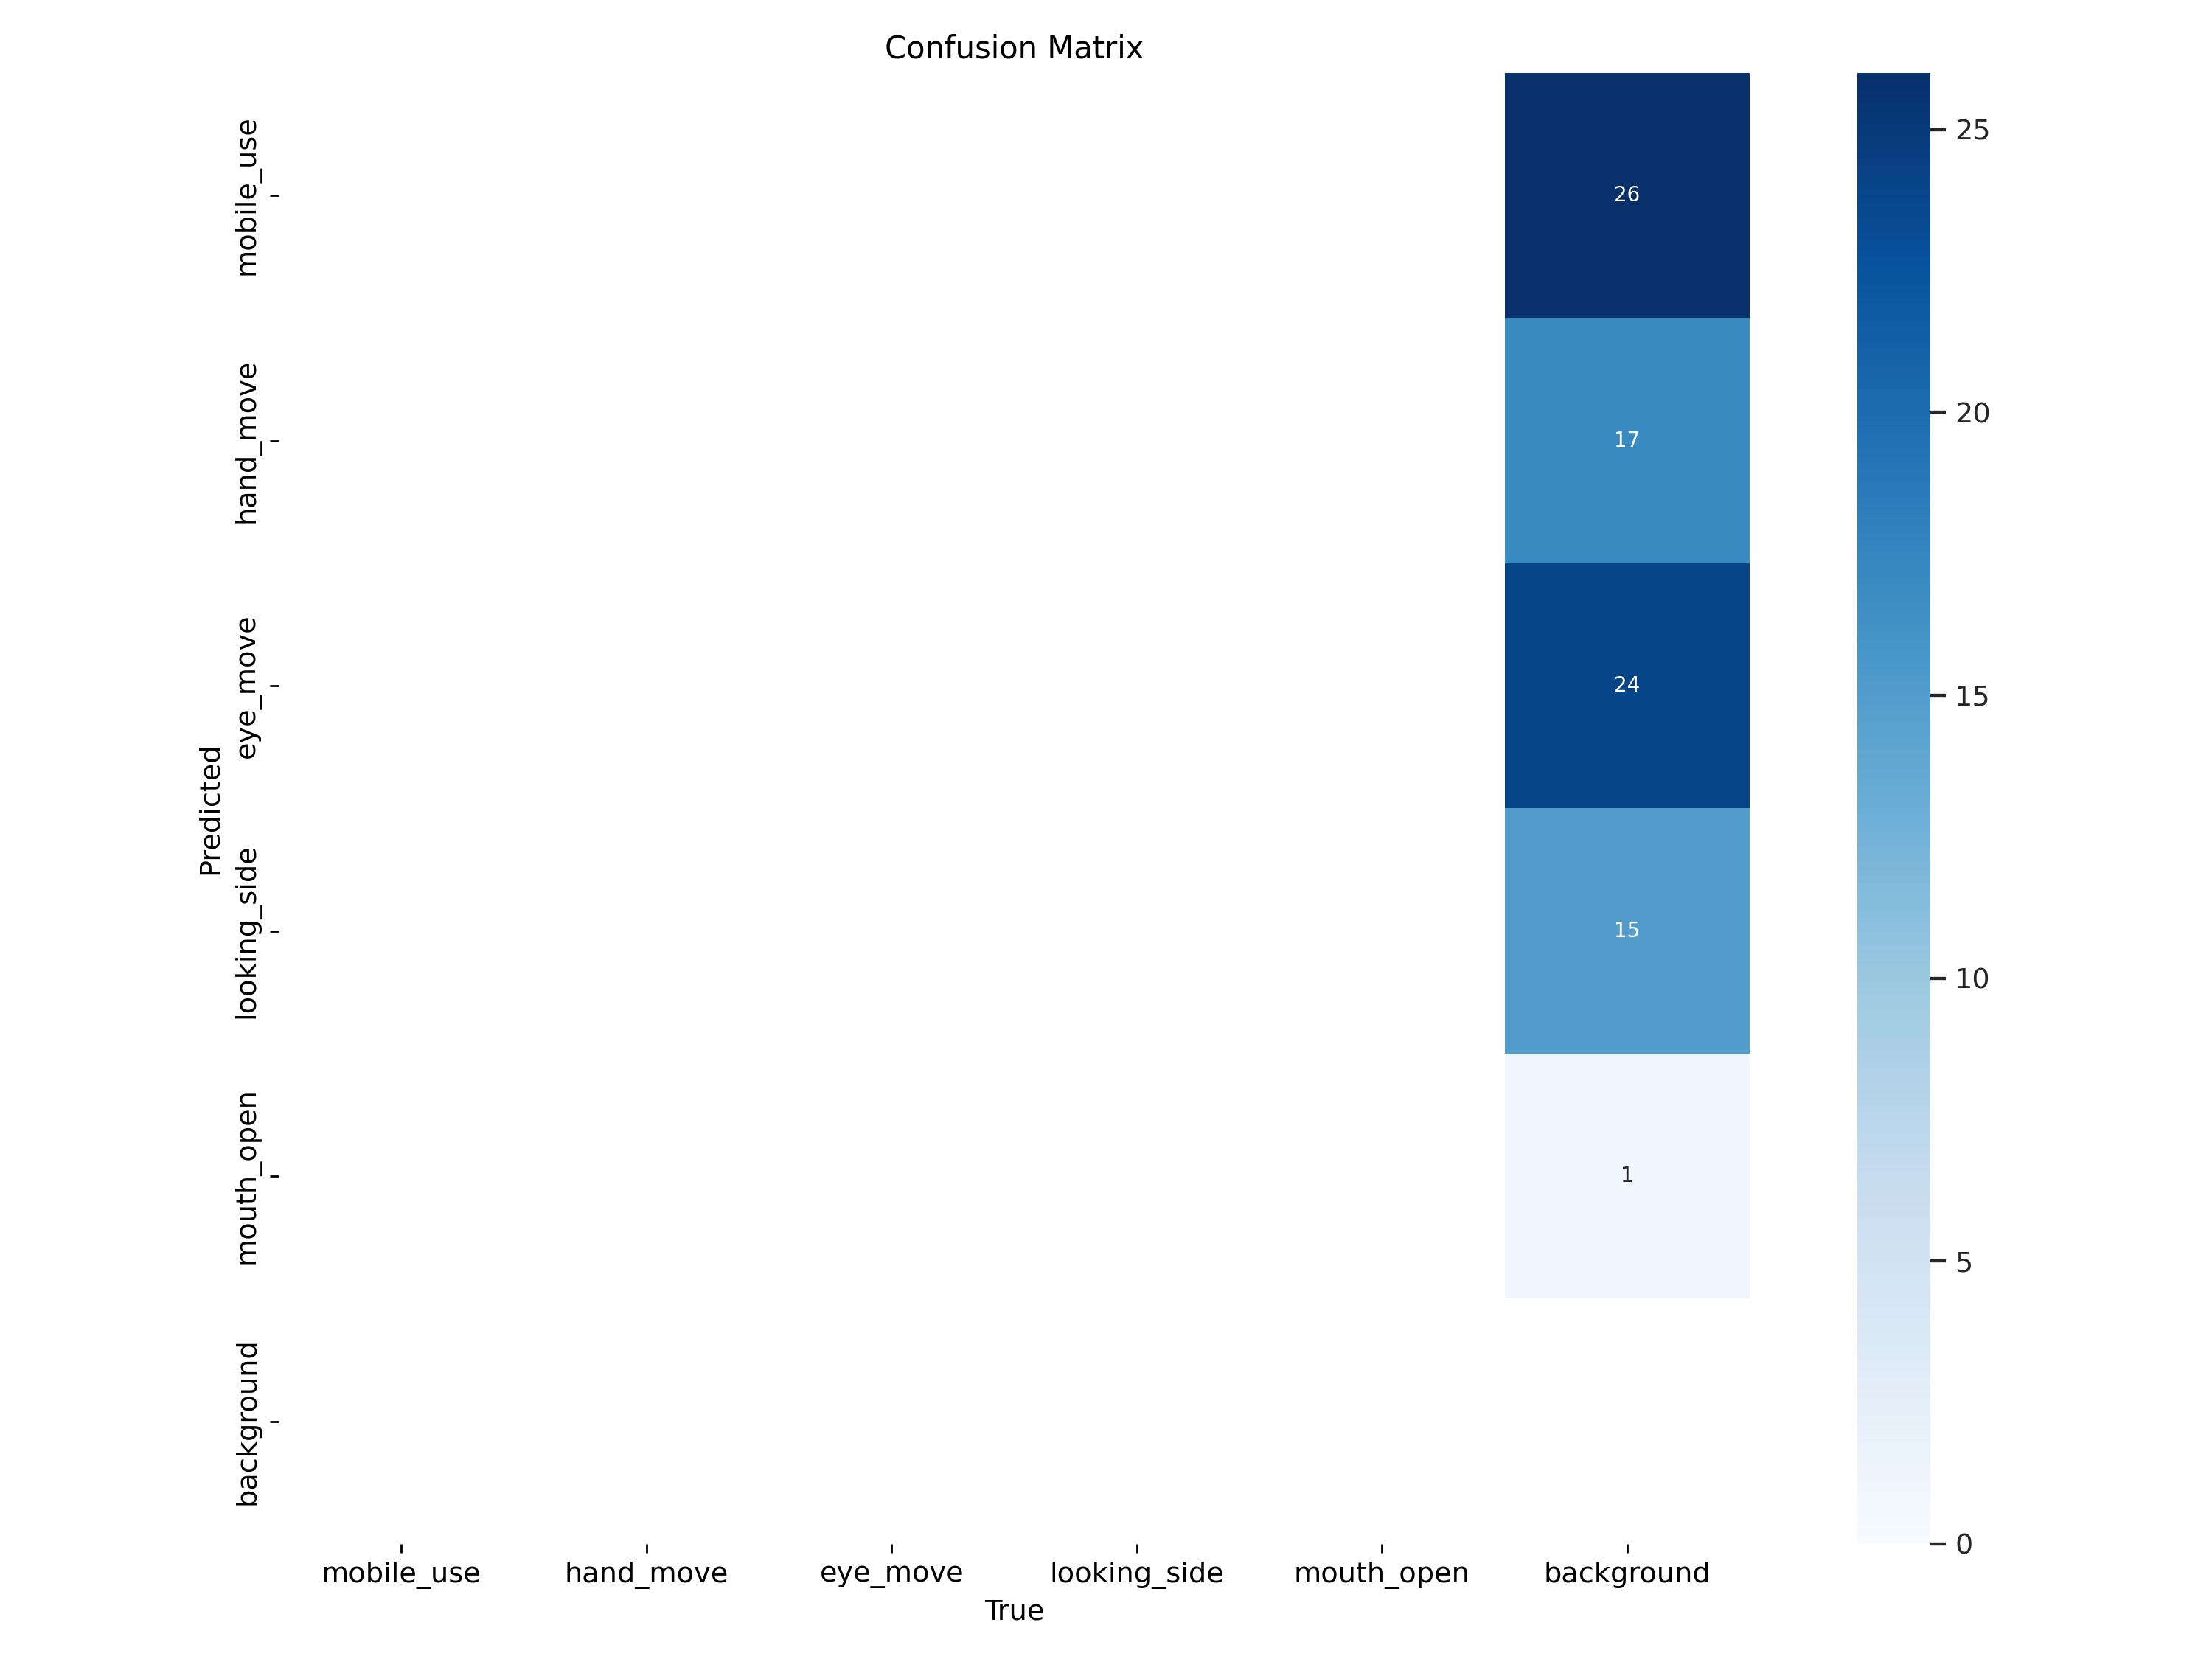

In [ ]:
from IPython.display import Image

Image(filename='/content/runs/detect/val_student_behavior/confusion_matrix.png', width=600)


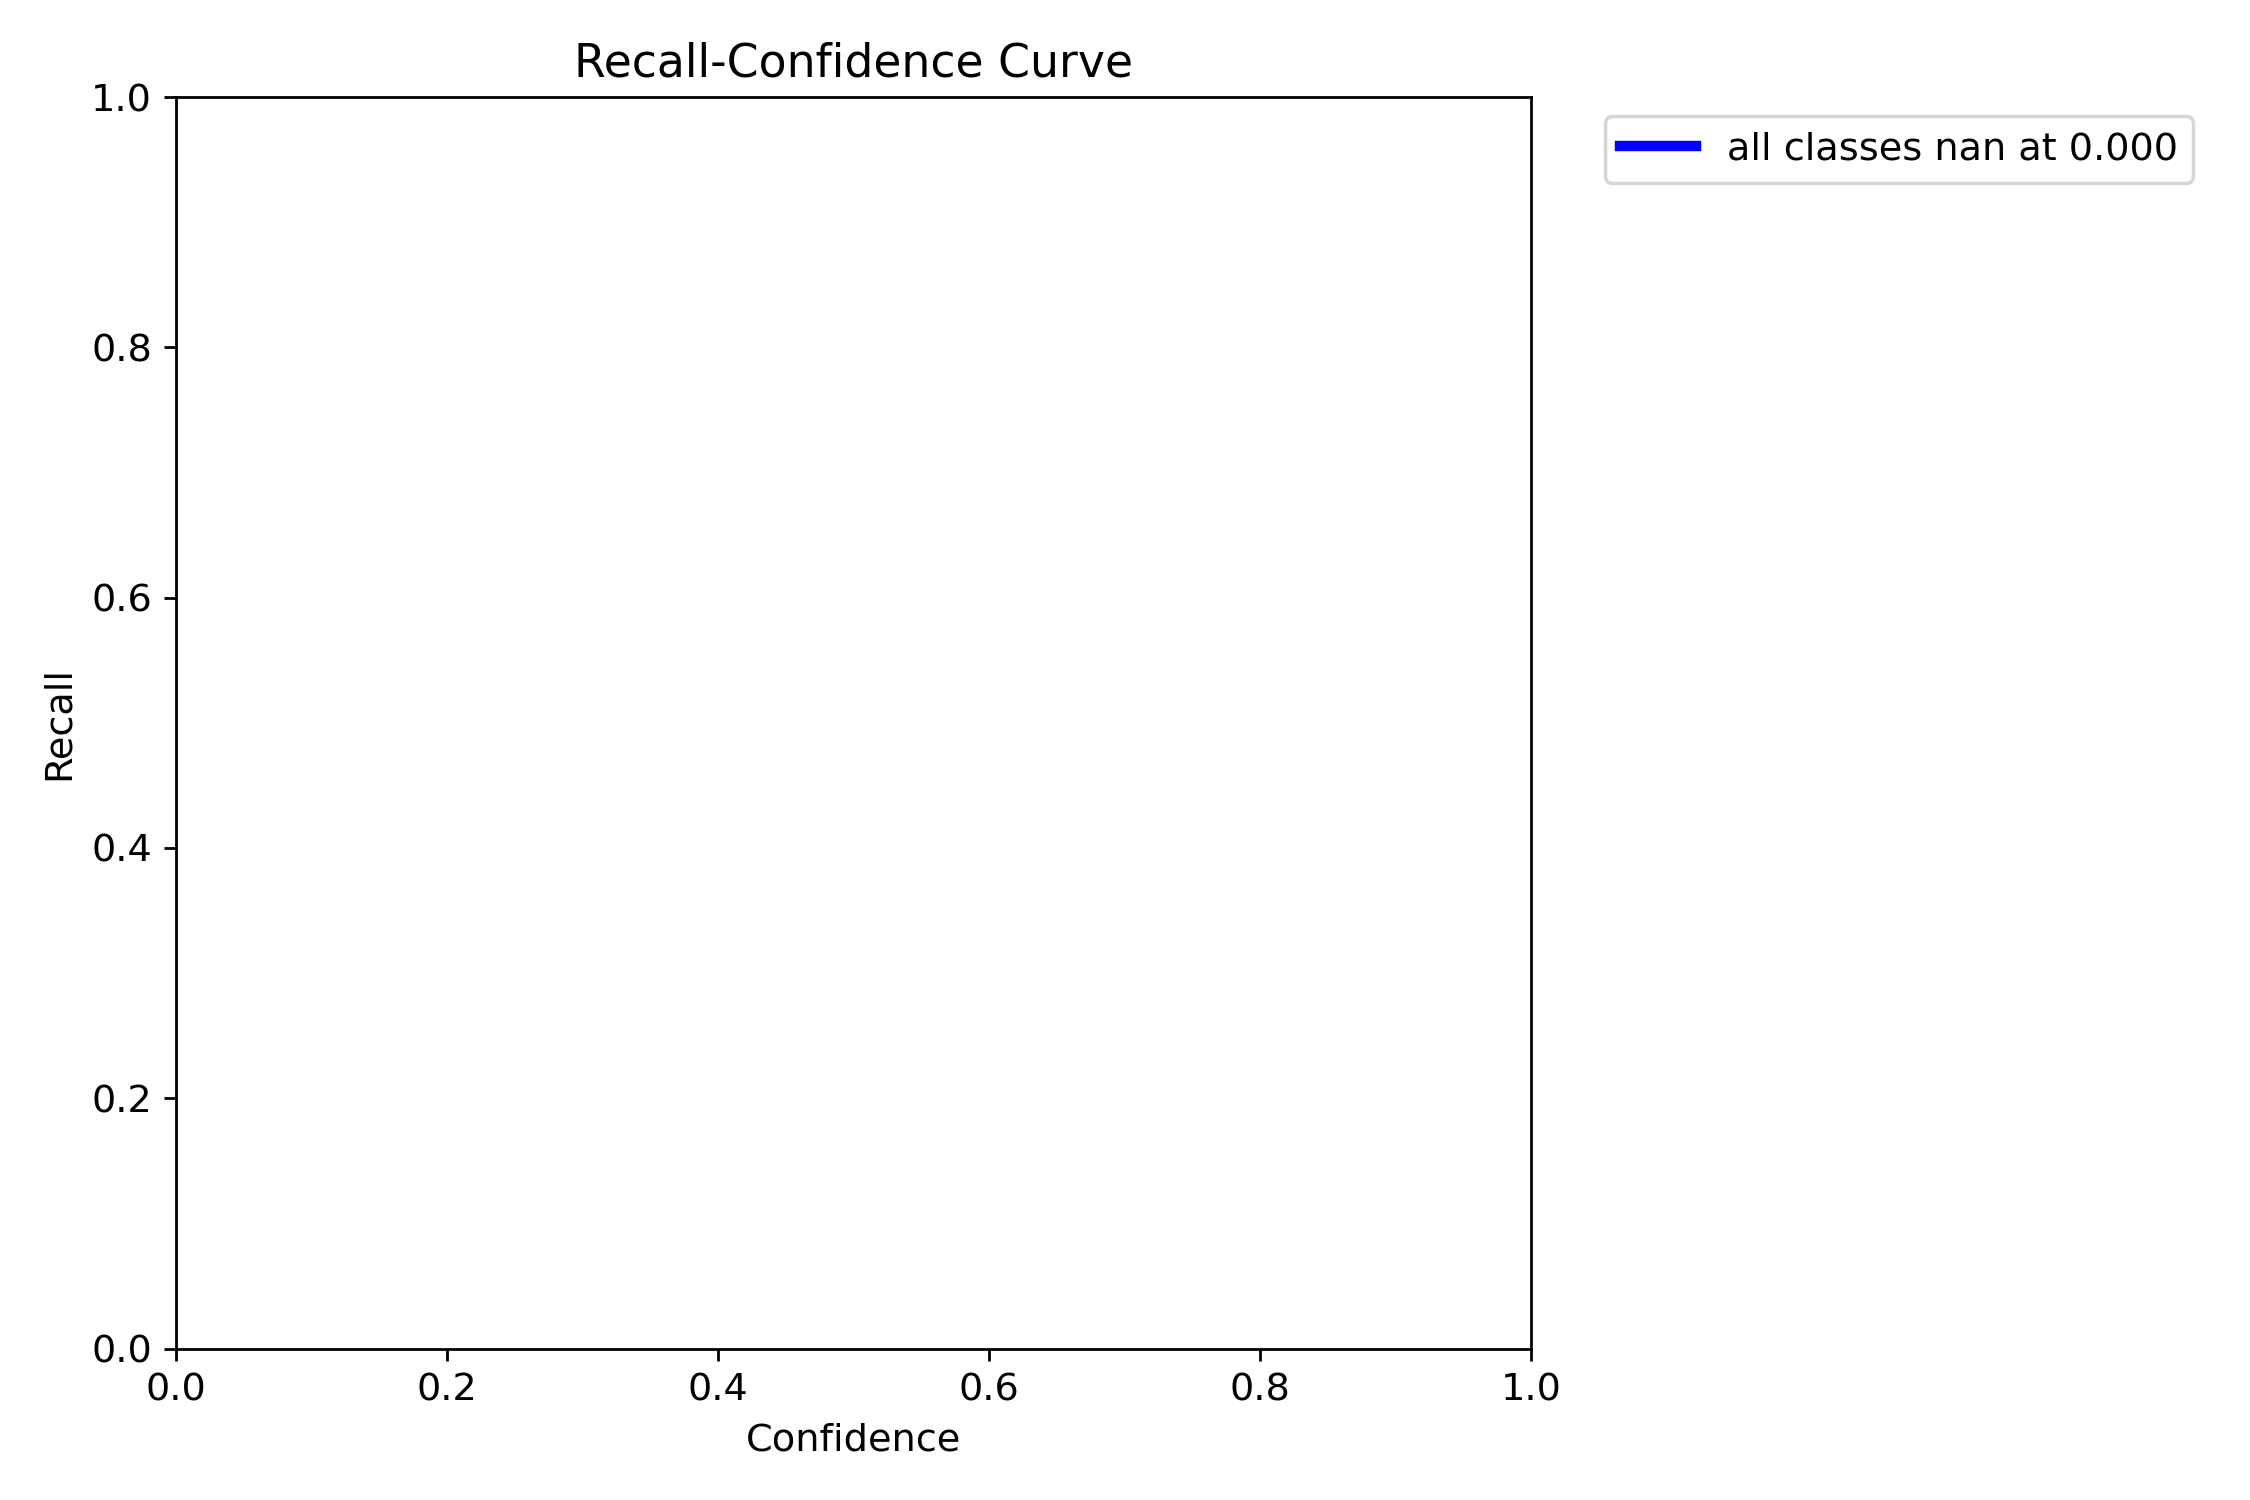

In [ ]:

Image(filename='/content/runs/detect/val_student_behavior/R_curve.png', width=600)


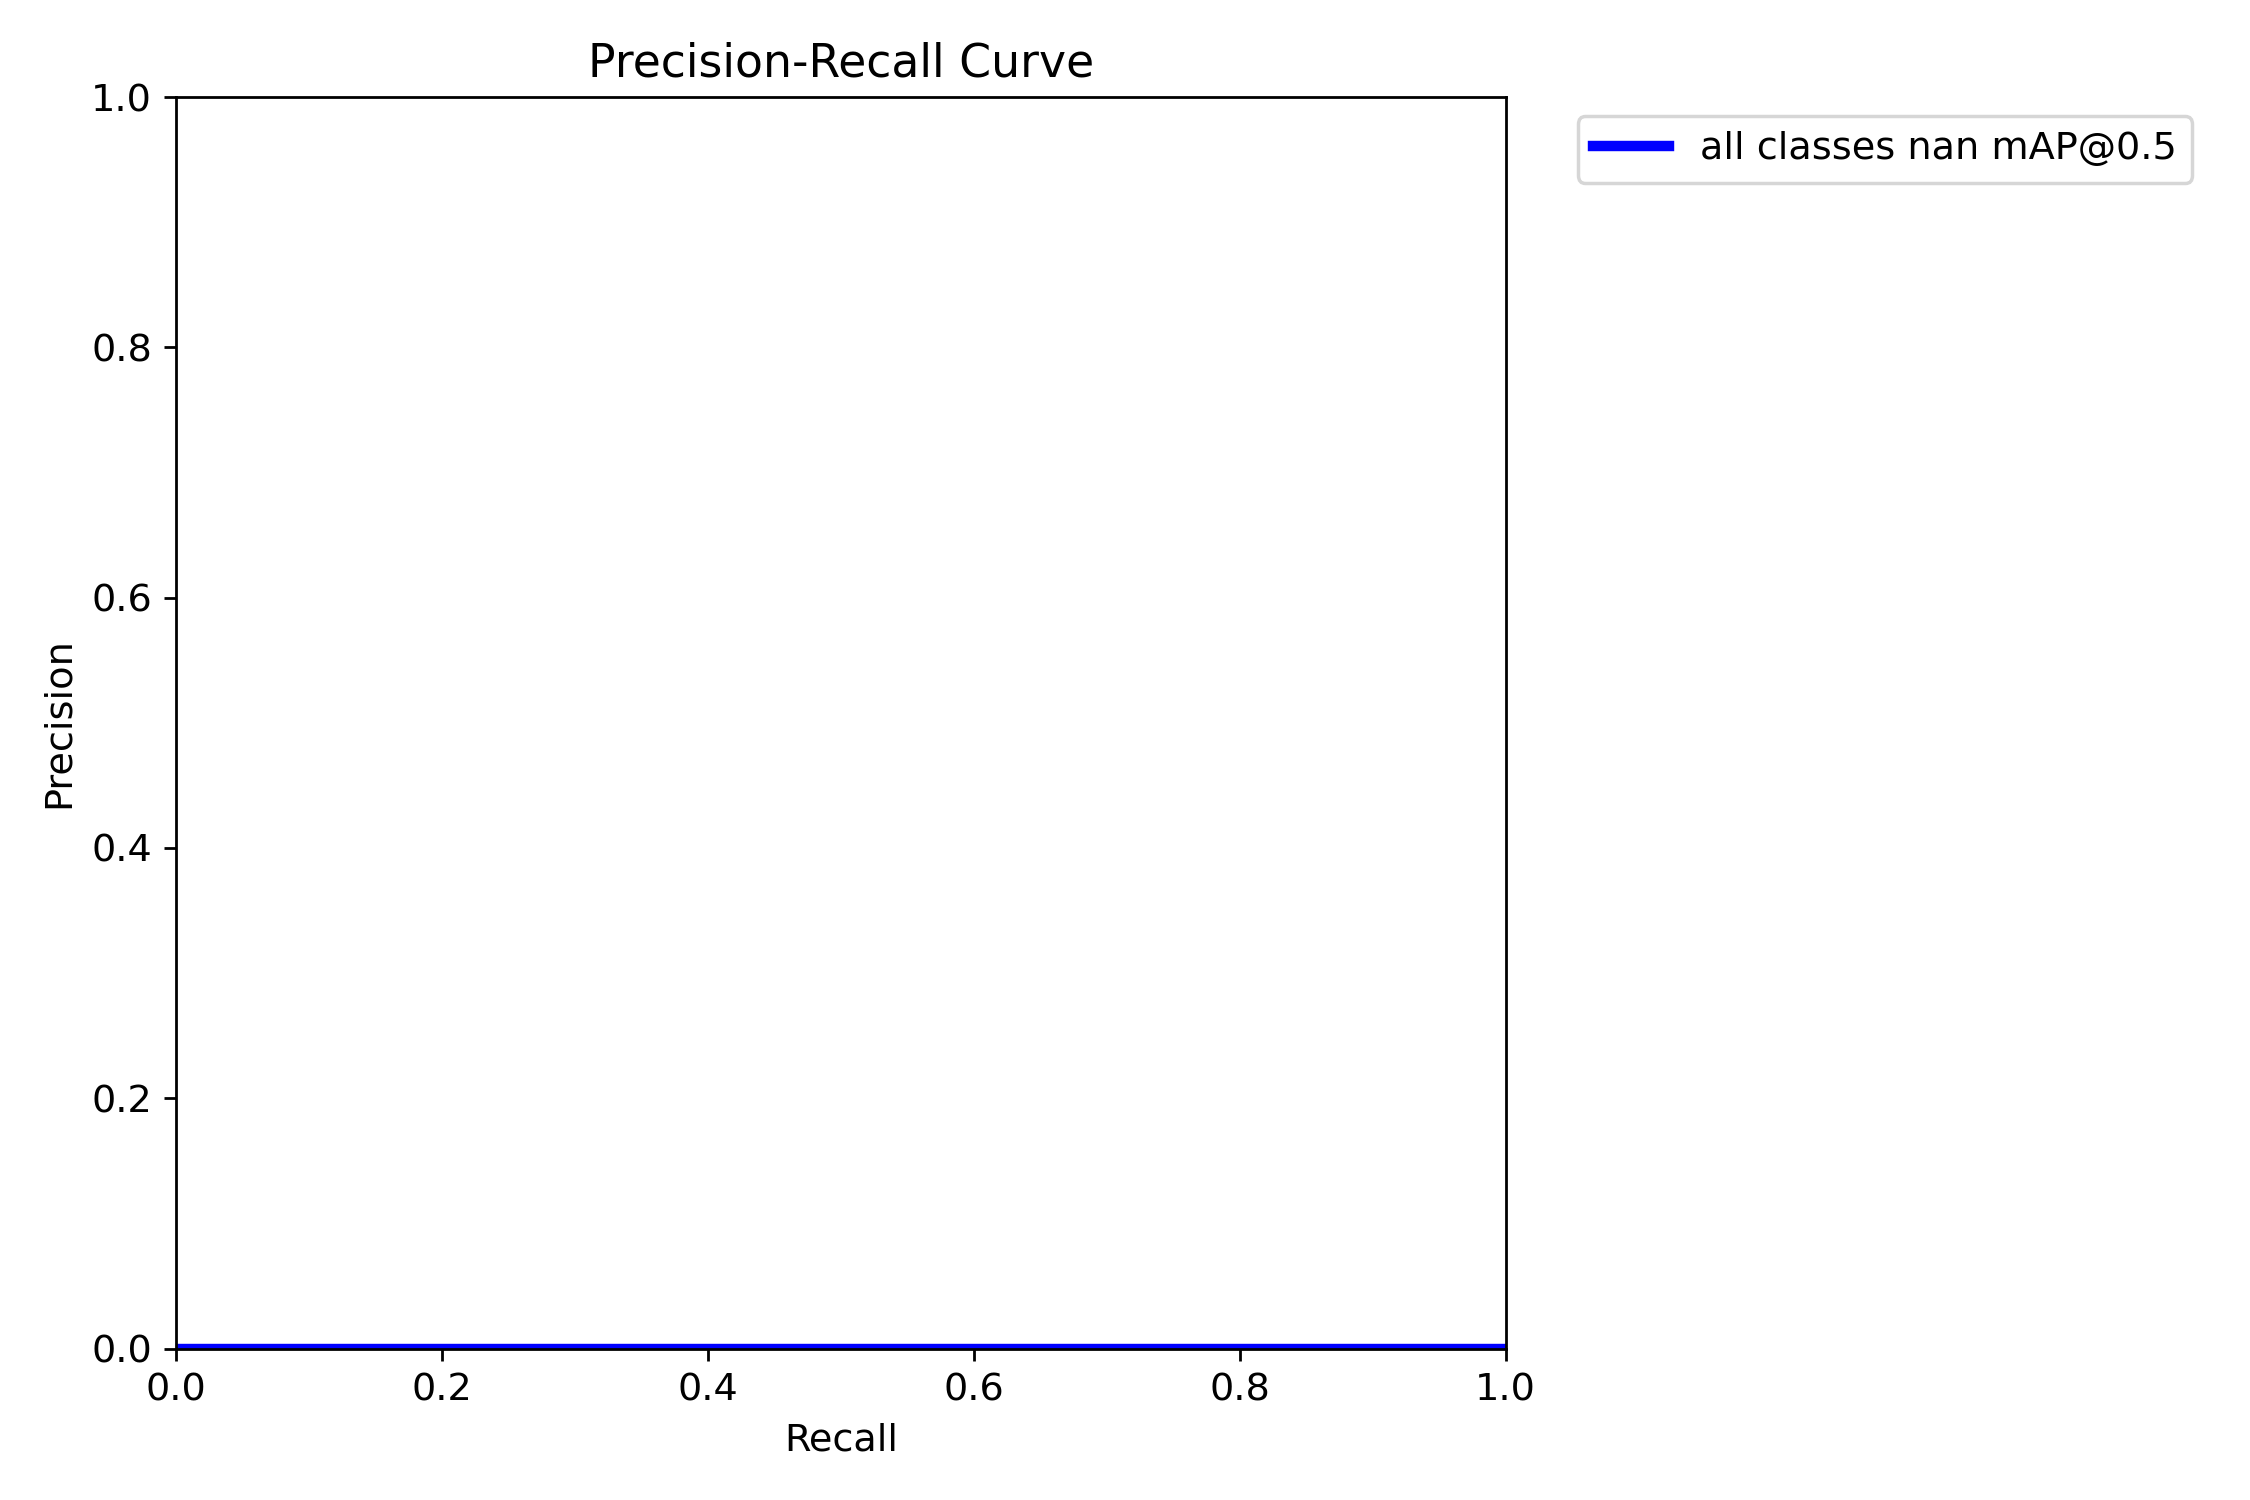

In [ ]:
Image(filename='/content/runs/detect/val_student_behavior/PR_curve.png', width=600)


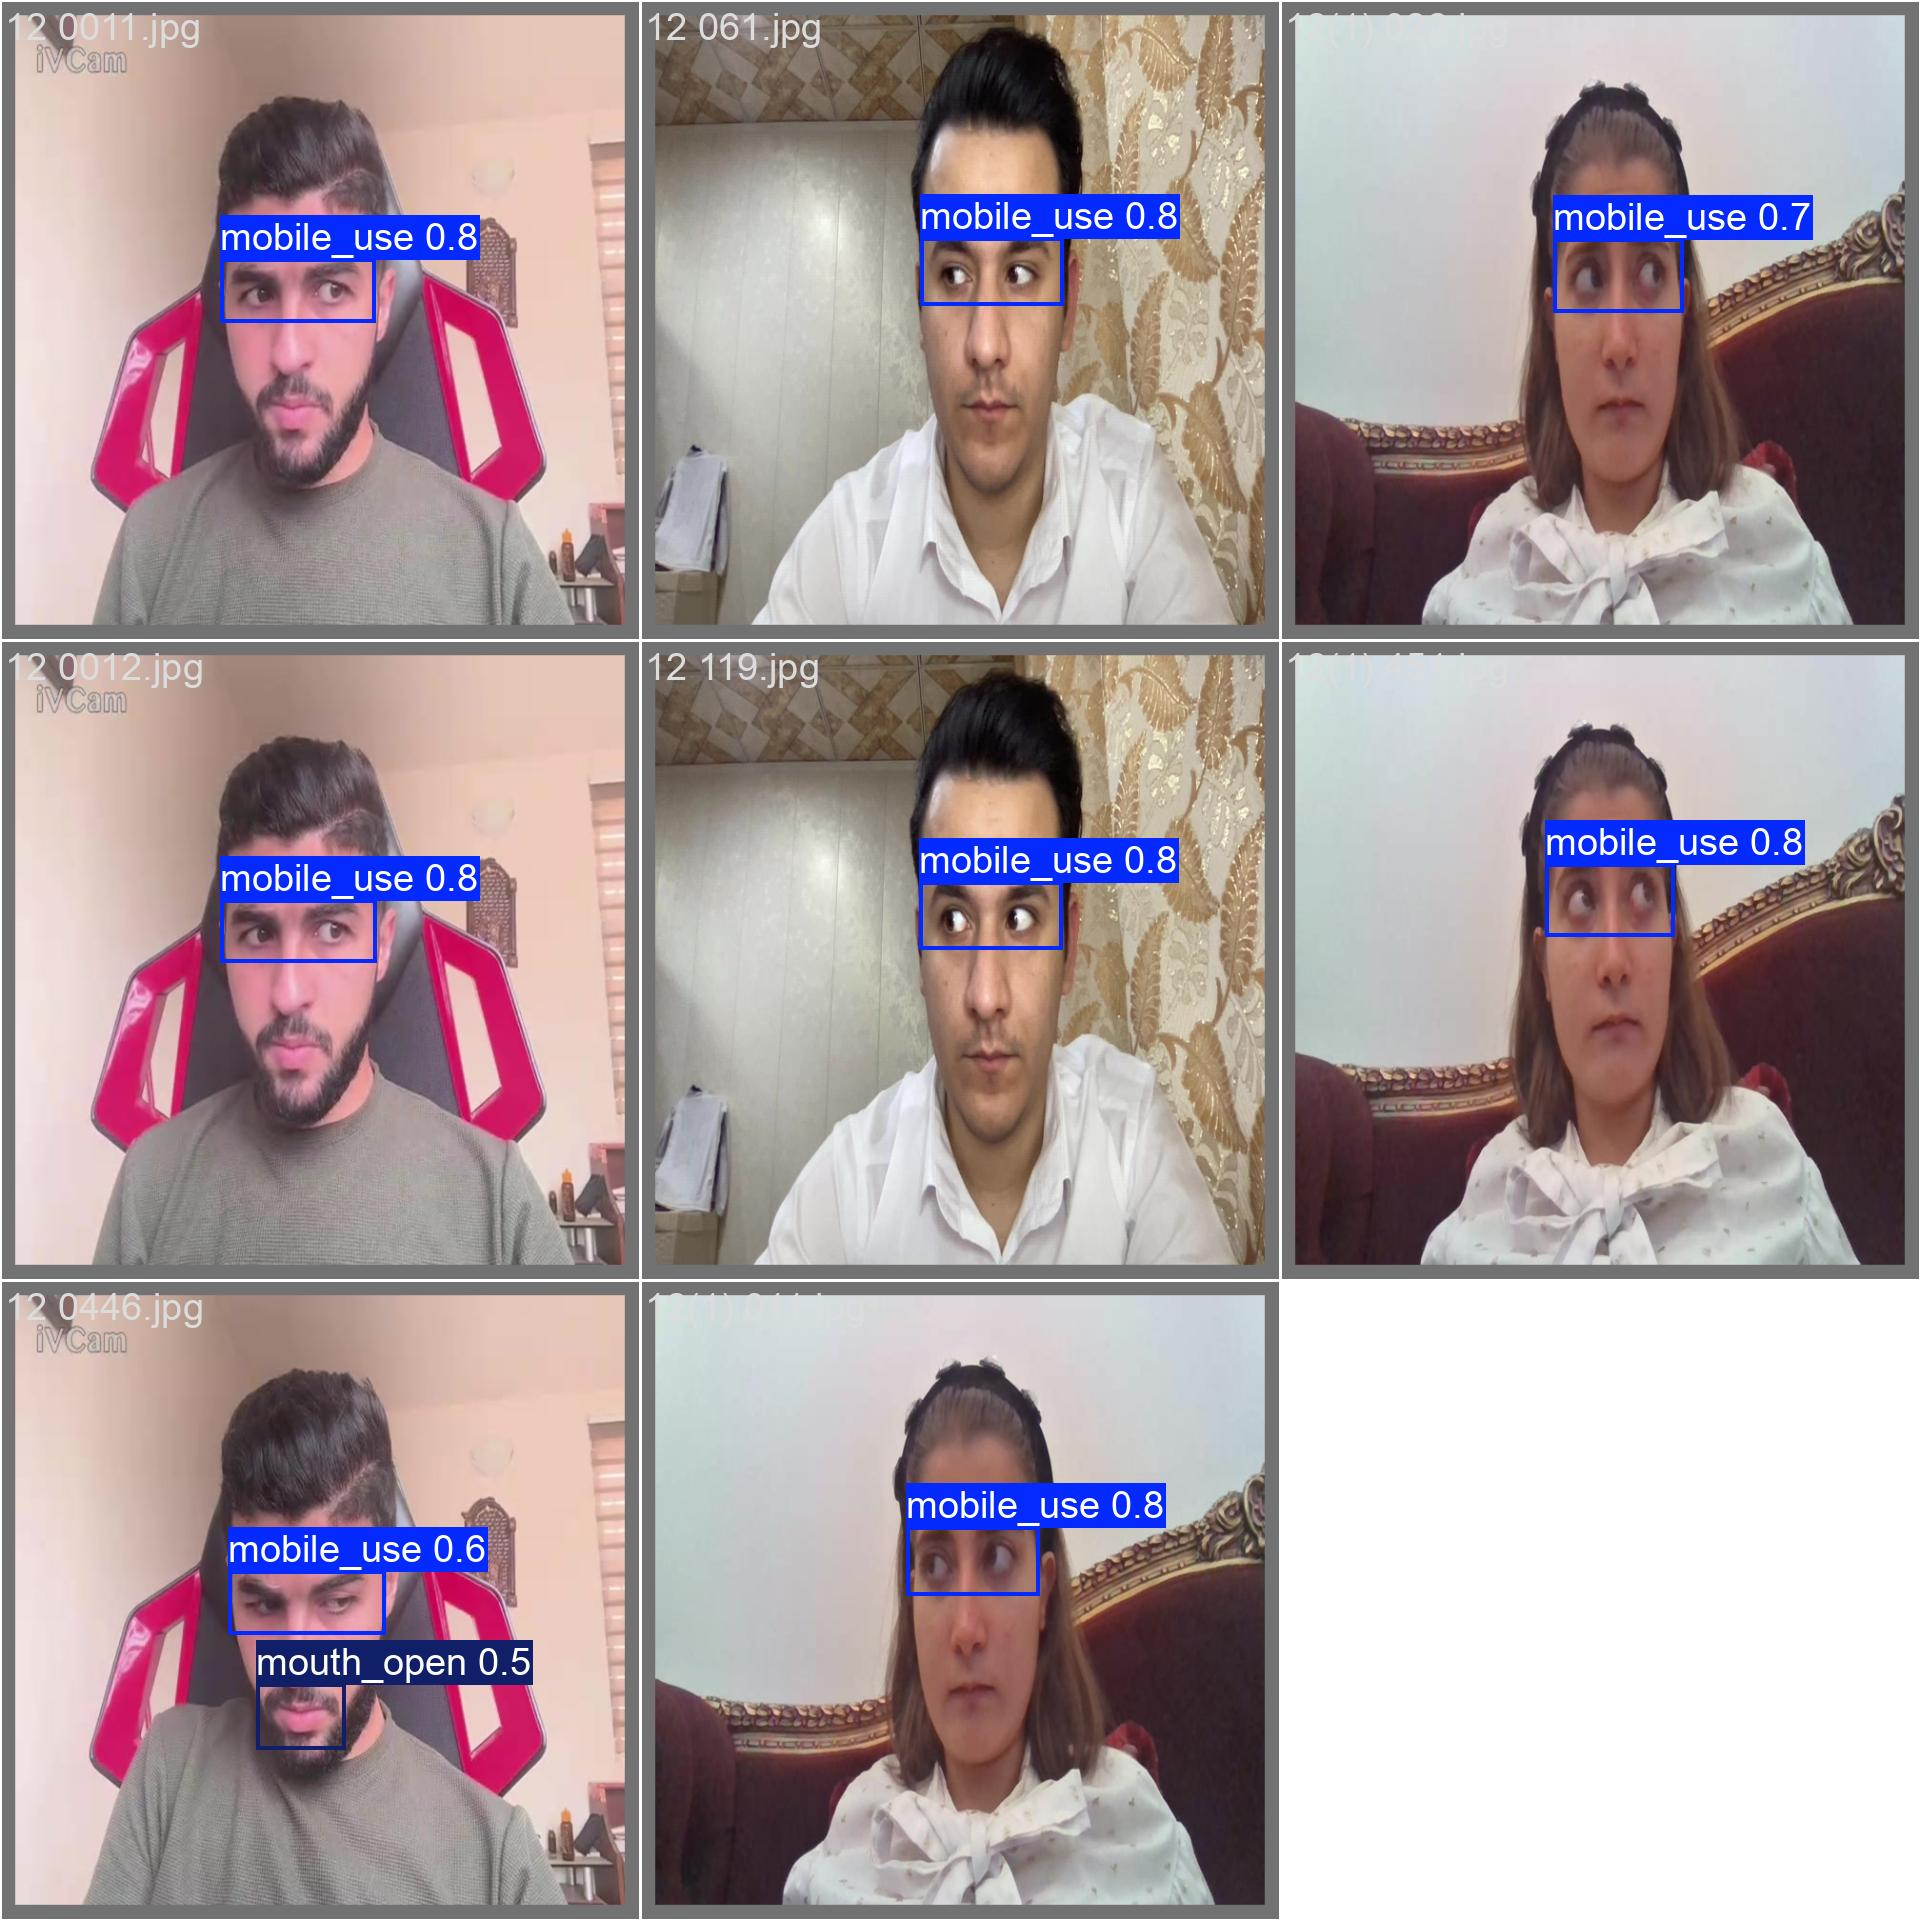

In [ ]:
Image(filename='/content/runs/detect/val_student_behavior/val_batch0_pred.jpg', width=600)


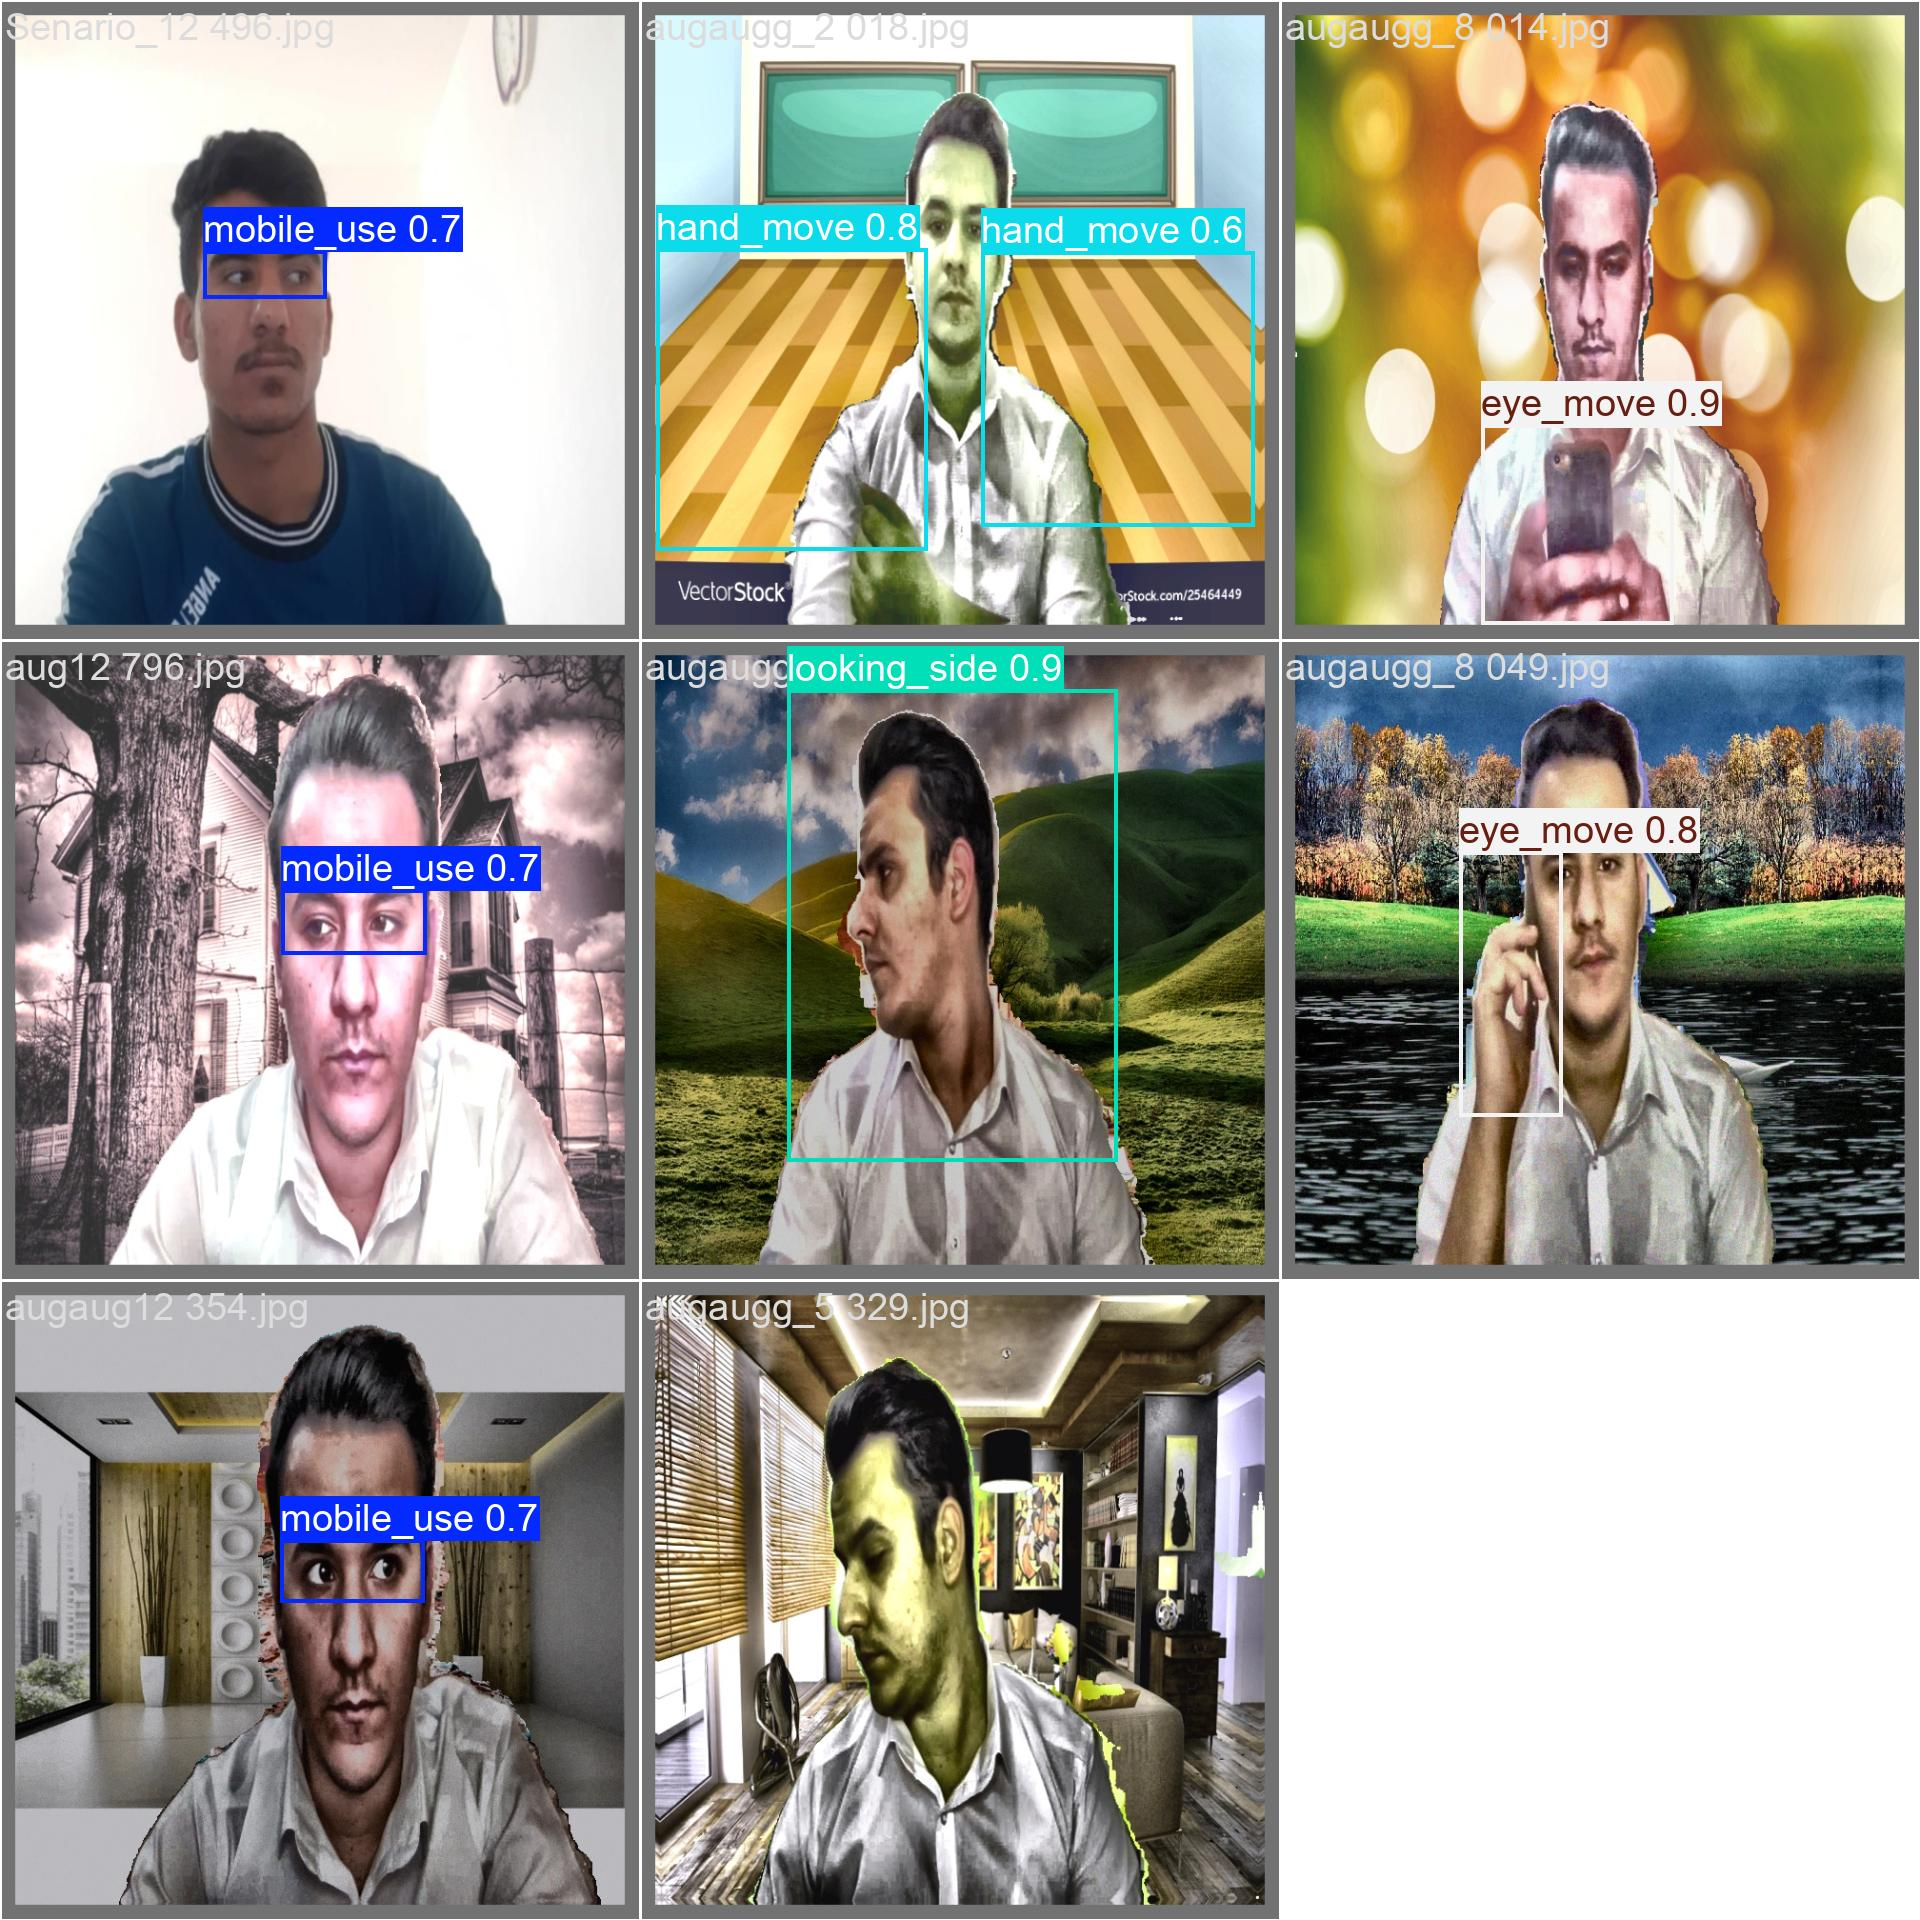

In [ ]:
Image(filename='/content/runs/detect/val_student_behavior/val_batch1_pred.jpg', width=600)


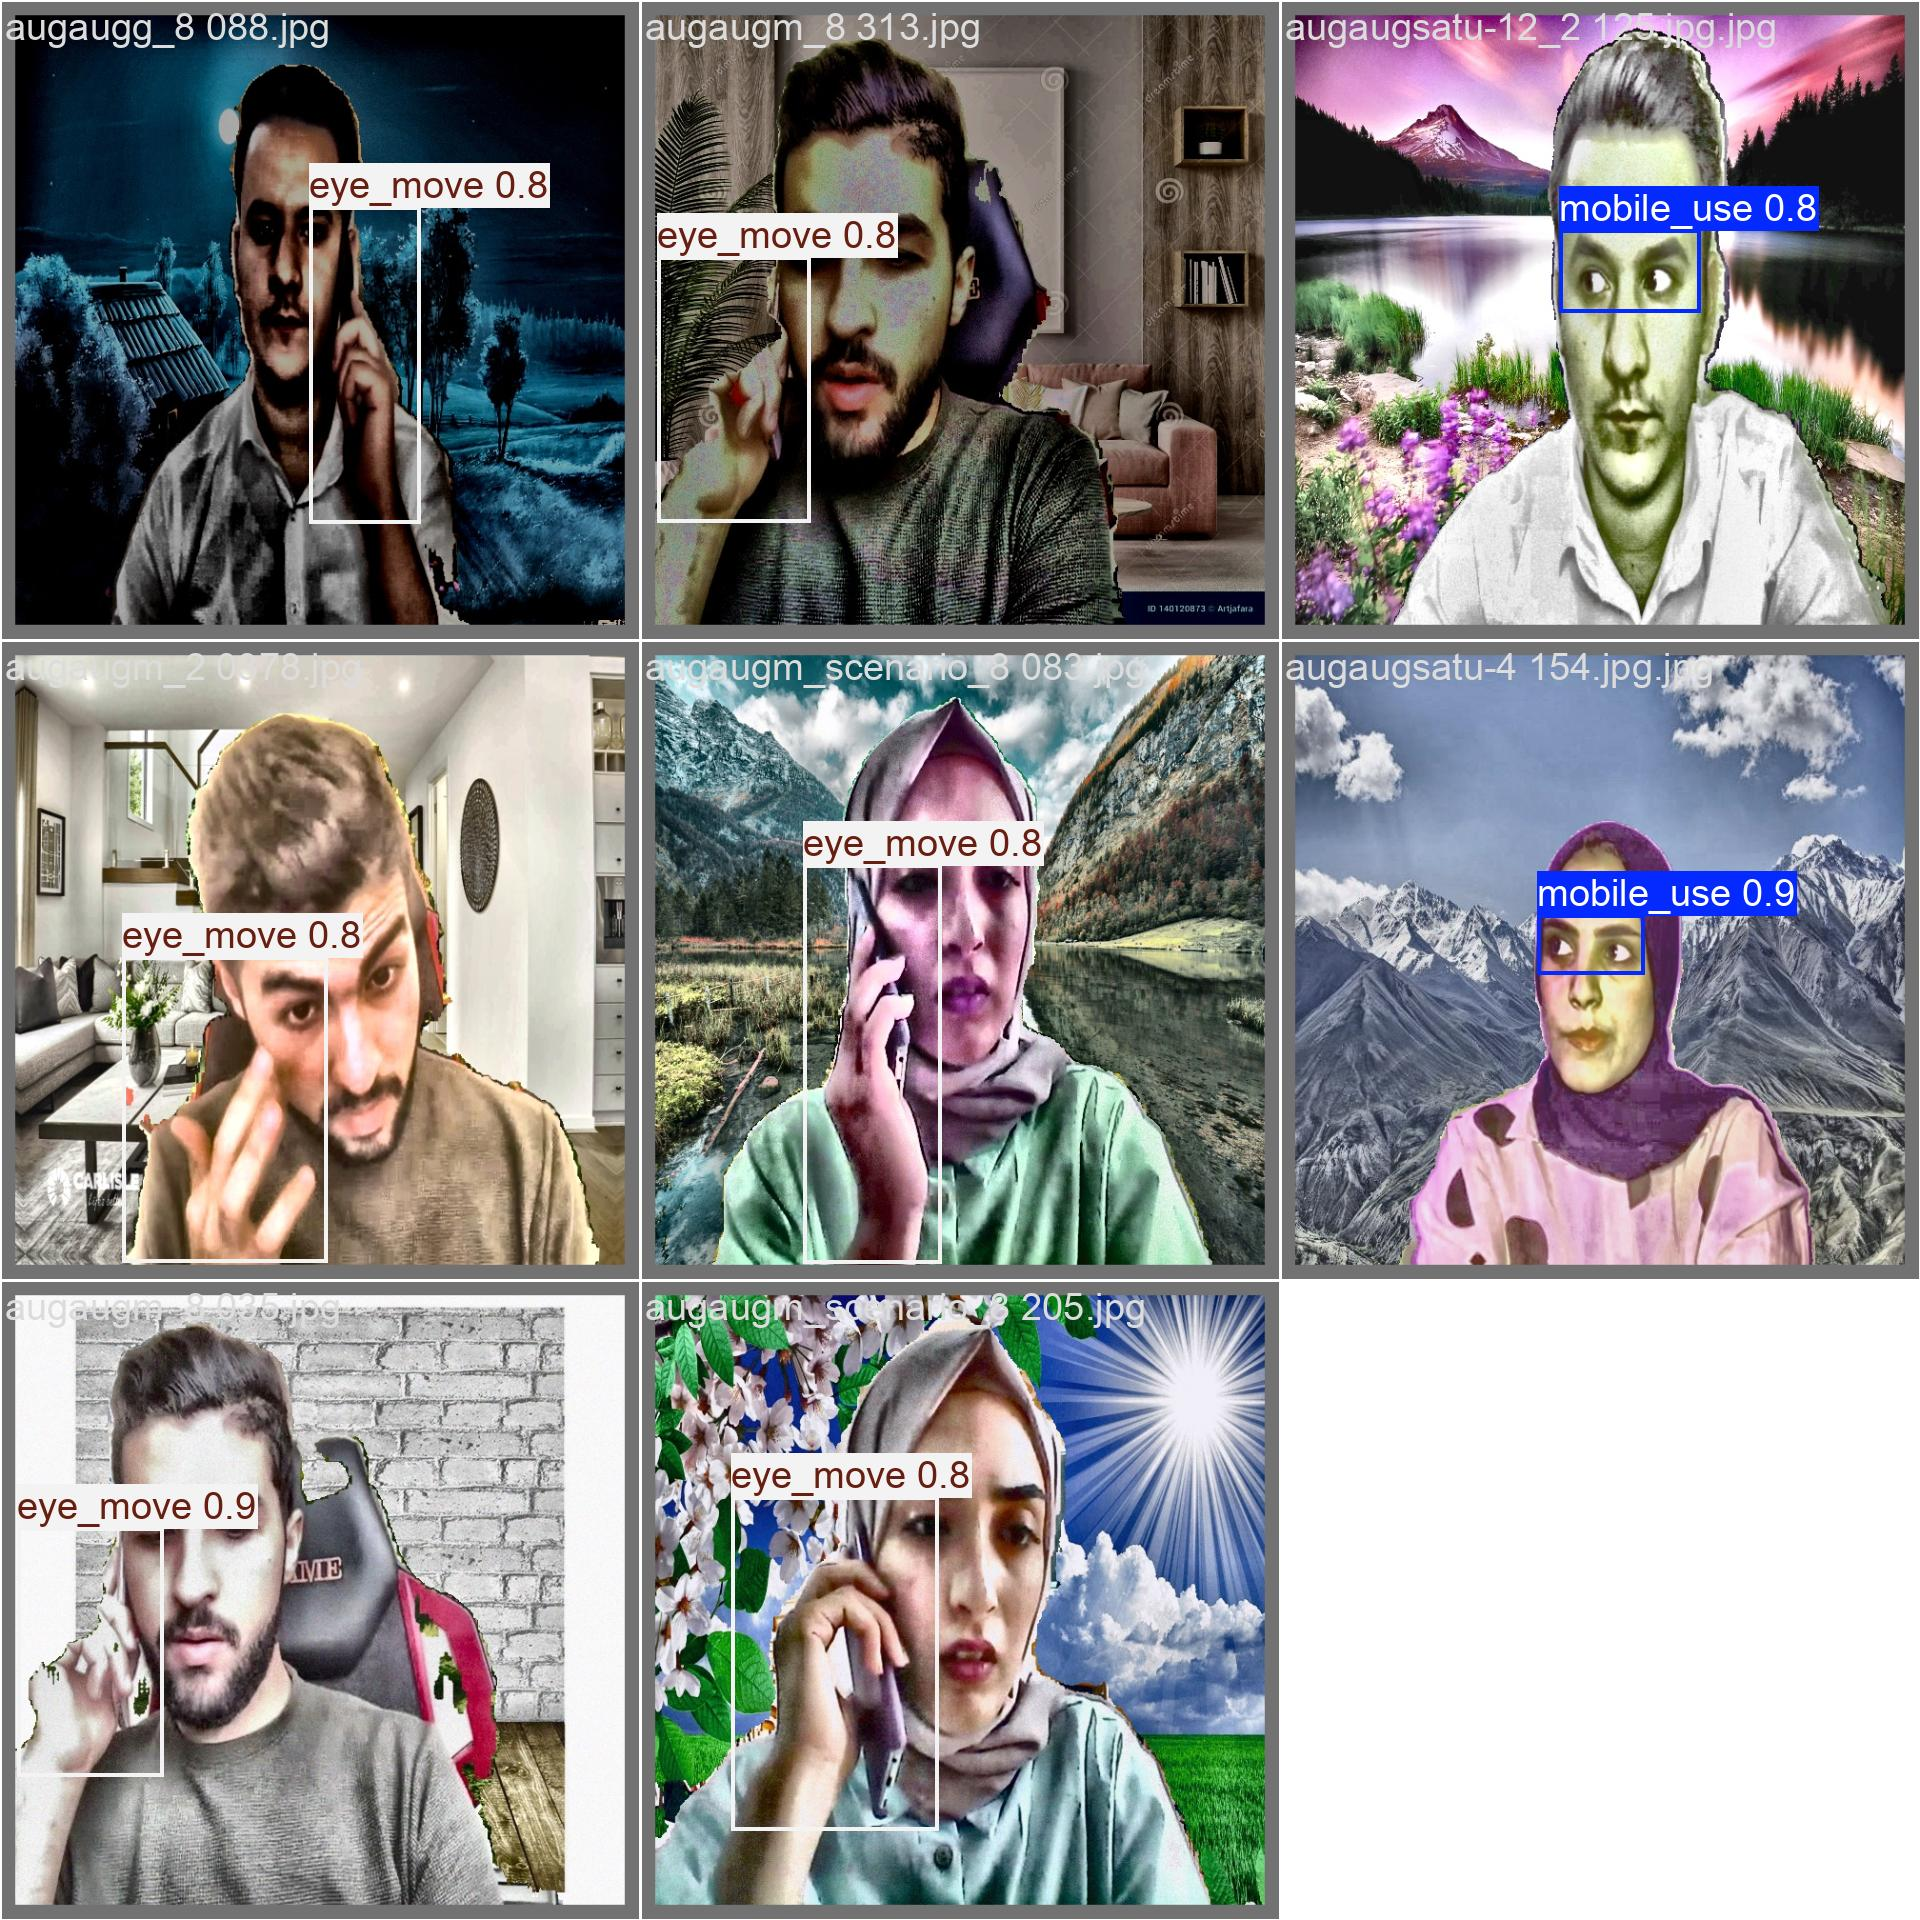

In [ ]:
Image(filename='/content/runs/detect/val_student_behavior/val_batch2_pred.jpg', width=600)

In [ ]:
from google.colab import files
files.download('/content/runs/detect/student_behavior_model2')


# Train Model - 50 epochs

In [ ]:
from ultralytics import YOLO

# 1. Load a pretrained YOLOv8 model (choose one: yolov8n, yolov8s, yolov8m, yolov8l, yolov8x)
model = YOLO('yolov8n.pt')  # 'n' is the smallest, fastest version

# 2. Train the model
results = model.train(
    data='/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml',  # path to your data.yaml
    epochs=50,        # number of training epochs
    batch=8,          # batch size (adjust based on GPU RAM)
    imgsz=640,        # image size
    name='student_behavior_model50'  ,# results will be saved in runs/detect/student_behavior_model50
    augment=True,  # Enable augmentation
    patience=10,   # Early stopping if no improvement
)


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml, epochs=50, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=student_behavior_model502, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/train/labels.cache... 4395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4395/4395 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels.cache... 1099 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1099/1099 [00:00<?, ?it/s]


Plotting labels to runs/detect/student_behavior_model502/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/student_behavior_model502
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.13G      1.365      2.524      1.629          9        640: 100%|██████████| 550/550 [16:02<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.09it/s]


                   all       1099       1104      0.905      0.874      0.932       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.38G      1.256      1.548      1.475          4        640: 100%|██████████| 550/550 [01:55<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.43it/s]

                   all       1099       1104      0.834      0.736      0.887      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.38G       1.23      1.238      1.438          6        640: 100%|██████████| 550/550 [01:55<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.43it/s]


                   all       1099       1104      0.862      0.841      0.902      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.38G      1.204      1.107      1.413          9        640: 100%|██████████| 550/550 [01:53<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.53it/s]


                   all       1099       1104      0.935      0.965      0.971      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.38G      1.155     0.9953      1.378          5        640: 100%|██████████| 550/550 [01:53<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.56it/s]

                   all       1099       1104      0.902      0.955      0.967      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.38G      1.127     0.9262      1.357          3        640: 100%|██████████| 550/550 [01:54<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.40it/s]


                   all       1099       1104      0.936       0.97      0.986       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.38G      1.114     0.8732      1.339          7        640: 100%|██████████| 550/550 [01:53<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.61it/s]

                   all       1099       1104      0.964      0.973      0.986      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.38G      1.089     0.8088      1.327          7        640: 100%|██████████| 550/550 [01:53<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.64it/s]


                   all       1099       1104      0.971      0.982      0.991      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.38G      1.064      0.797      1.313          7        640: 100%|██████████| 550/550 [01:54<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.43it/s]


                   all       1099       1104      0.982      0.977      0.991      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.38G      1.036     0.7475      1.291          5        640: 100%|██████████| 550/550 [01:53<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.68it/s]

                   all       1099       1104      0.965      0.986      0.989      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.39G      1.034     0.7311      1.292         11        640: 100%|██████████| 550/550 [01:53<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.66it/s]

                   all       1099       1104      0.976      0.983      0.993      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.39G      1.019      0.701       1.28          7        640: 100%|██████████| 550/550 [01:54<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.44it/s]


                   all       1099       1104      0.933      0.978      0.984      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.4G      1.003     0.6828      1.266          6        640: 100%|██████████| 550/550 [01:52<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.58it/s]


                   all       1099       1104       0.98      0.984      0.992      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.4G     0.9946     0.6724      1.264          7        640: 100%|██████████| 550/550 [01:53<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.59it/s]

                   all       1099       1104       0.99      0.988      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.4G     0.9751     0.6606      1.246          5        640: 100%|██████████| 550/550 [01:53<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.34it/s]

                   all       1099       1104       0.98      0.993      0.993      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.4G     0.9638      0.635      1.238          4        640: 100%|██████████| 550/550 [01:53<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.63it/s]


                   all       1099       1104      0.983      0.986      0.991      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.4G     0.9553     0.6213      1.234          6        640: 100%|██████████| 550/550 [01:53<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.65it/s]

                   all       1099       1104      0.993      0.992      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.4G     0.9418     0.6103      1.228          9        640: 100%|██████████| 550/550 [01:53<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.32it/s]

                   all       1099       1104      0.981      0.992      0.993      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.4G     0.9255     0.5921      1.222          8        640: 100%|██████████| 550/550 [01:53<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.64it/s]

                   all       1099       1104      0.991      0.996      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.4G     0.9325     0.5893      1.216          4        640: 100%|██████████| 550/550 [01:52<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.65it/s]

                   all       1099       1104      0.987      0.993      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.4G     0.9252     0.5742      1.212          5        640: 100%|██████████| 550/550 [01:52<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.60it/s]


                   all       1099       1104      0.984      0.987      0.994       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.4G     0.9206     0.5612      1.208          3        640: 100%|██████████| 550/550 [01:53<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.45it/s]

                   all       1099       1104       0.99      0.995      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.42G     0.9101     0.5538      1.196         11        640: 100%|██████████| 550/550 [01:52<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.64it/s]

                   all       1099       1104      0.991      0.994      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.44G     0.9027     0.5505      1.192          2        640: 100%|██████████| 550/550 [01:54<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.66it/s]

                   all       1099       1104      0.992      0.993      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.45G     0.8871      0.539      1.192          4        640: 100%|██████████| 550/550 [01:54<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.51it/s]

                   all       1099       1104       0.99      0.994      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.46G     0.8907     0.5344      1.188          4        640: 100%|██████████| 550/550 [01:52<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.57it/s]

                   all       1099       1104      0.994      0.997      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.49G     0.8798      0.529      1.182          8        640: 100%|██████████| 550/550 [01:52<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.65it/s]

                   all       1099       1104      0.995      0.995      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.49G     0.8802      0.524      1.181          8        640: 100%|██████████| 550/550 [01:52<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.65it/s]

                   all       1099       1104      0.992      0.996      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.49G     0.8729     0.5147      1.173          3        640: 100%|██████████| 550/550 [01:53<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.57it/s]

                   all       1099       1104      0.996      0.996      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.49G     0.8646     0.5079      1.167          9        640: 100%|██████████| 550/550 [01:52<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.61it/s]


                   all       1099       1104      0.993      0.997      0.995      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.49G     0.8611     0.5019      1.169          3        640: 100%|██████████| 550/550 [01:52<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.60it/s]


                   all       1099       1104      0.988      0.999      0.995      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.49G      0.864      0.489      1.164          5        640: 100%|██████████| 550/550 [01:52<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.55it/s]

                   all       1099       1104      0.998      0.998      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.49G     0.8498     0.4929      1.164          2        640: 100%|██████████| 550/550 [01:52<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.58it/s]

                   all       1099       1104      0.991      0.996      0.994      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.49G     0.8577     0.4914      1.166          9        640: 100%|██████████| 550/550 [01:53<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.66it/s]

                   all       1099       1104      0.995      0.999      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.49G     0.8401     0.4748      1.157          4        640: 100%|██████████| 550/550 [01:52<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.74it/s]

                   all       1099       1104      0.996      0.998      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.49G     0.8343     0.4697      1.156          6        640: 100%|██████████| 550/550 [01:51<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.65it/s]

                   all       1099       1104      0.997          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.49G     0.8297      0.457      1.151          6        640: 100%|██████████| 550/550 [01:52<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.39it/s]

                   all       1099       1104      0.998      0.997      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.49G     0.8298      0.467      1.145          4        640: 100%|██████████| 550/550 [01:54<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.67it/s]

                   all       1099       1104      0.997      0.996      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.49G     0.8205     0.4509      1.147          8        640: 100%|██████████| 550/550 [01:52<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.57it/s]


                   all       1099       1104      0.999      0.999      0.995      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.49G     0.8178     0.4431      1.136          6        640: 100%|██████████| 550/550 [01:53<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.66it/s]


                   all       1099       1104      0.995      0.997      0.995      0.794
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.49G     0.8162     0.3491      1.161          3        640: 100%|██████████| 550/550 [01:50<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.66it/s]

                   all       1099       1104      0.999      0.999      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.49G     0.8064      0.338      1.152          3        640: 100%|██████████| 550/550 [01:48<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.63it/s]

                   all       1099       1104      0.999      0.999      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.49G     0.8015     0.3374      1.143          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.57it/s]

                   all       1099       1104      0.999          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.49G     0.7871     0.3317       1.14          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.60it/s]

                   all       1099       1104          1      0.999      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.49G     0.7857     0.3242      1.134          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.69it/s]

                   all       1099       1104      0.998          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.49G      0.776      0.318      1.132          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.63it/s]

                   all       1099       1104      0.998      0.999      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.49G     0.7688     0.3144       1.12          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.59it/s]

                   all       1099       1104      0.999          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.49G     0.7617     0.3115      1.123          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:15<00:00,  4.58it/s]

                   all       1099       1104      0.999          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.49G     0.7616     0.3103       1.12          3        640: 100%|██████████| 550/550 [01:49<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.68it/s]


                   all       1099       1104      0.999      0.999      0.995      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.49G     0.7486     0.3063      1.109          3        640: 100%|██████████| 550/550 [01:48<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.74it/s]


                   all       1099       1104      0.999      0.999      0.995      0.809

50 epochs completed in 2.018 hours.
Optimizer stripped from runs/detect/student_behavior_model502/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/student_behavior_model502/weights/best.pt, 6.3MB

Validating runs/detect/student_behavior_model502/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:19<00:00,  3.56it/s]


                   all       1099       1104      0.995      0.998      0.995      0.806
            mobile_use        265        265      0.996      0.996      0.995       0.75
             hand_move        218        223      0.982      0.999      0.995      0.832
              eye_move        204        204      0.997          1      0.995      0.779
          looking_side        230        230          1      0.996      0.995      0.933
            mouth_open        182        182          1          1      0.995      0.737
Speed: 0.3ms preprocess, 8.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/student_behavior_model502


# Testing the 50 epoch model

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('runs/detect/student_behavior_model502/weights/best.pt')

# Validate on test set
metrics = model.val(
    data='/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/data.yaml',  # Updated path to your data.yaml
    split='test',  # or 'val',
    batch=8,
    imgsz=640,
    conf=0.5,  # Confidence threshold
    iou=0.5,   # IoU threshold
    name='yolov8_val'
)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels.cache... 0 images, 81 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core

                   all         81          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 4.5ms preprocess, 10.8ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/yolov8_val5


In [ ]:

model.predict(
    source='/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images',
    conf=0.5,
    save=True,
    save_txt=True,
    save_conf=True
)




image 1/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12 0011.jpg: 640x640 1 mobile_use, 14.5ms
image 2/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12 0012.jpg: 640x640 1 mobile_use, 8.0ms
image 3/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12 0446.jpg: 640x640 1 mobile_use, 7.8ms
image 4/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12 061.jpg: 640x640 1 mobile_use, 7.8ms
image 5/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12 119.jpg: 640x640 1 mobile_use, 7.8ms
image 6/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12(1) 011.jpg: 640x640 1 mobile_use, 7.6ms
image 7/81 /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/images/12(1) 022.jpg: 640x640 1

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'mobile_use', 1: 'hand_move', 2: 'eye_move', 3: 'looking_side', 4: 'mouth_open'}
 obb: None
 orig_img: array([[[190, 197, 217],
         [190, 197, 217],
         [190, 197, 217],
         ...,
         [183, 198, 230],
         [183, 198, 230],
         [183, 198, 230]],
 
        [[191, 198, 218],
         [190, 197, 217],
         [190, 197, 217],
         ...,
         [183, 198, 230],
         [183, 198, 230],
         [183, 198, 230]],
 
        [[191, 198, 218],
         [190, 197, 217],
         [190, 197, 217],
         ...,
         [183, 198, 230],
         [183, 198, 230],
         [183, 198, 230]],
 
        ...,
 
        [[220, 218, 237],
         [220, 218, 237],
         [220, 218, 237],
         ...,
         [ 95,  98, 149],
         [ 94,  96, 154],
         [ 94,  95, 155]],
 
        [[220, 218, 237],
         [220

# Inference
Overall Performance (mAP50):

Both models achieve near-perfect mAP50 (0.995), meaning they detect objects almost flawlessly at IoU=0.5.

No significant improvement in mAP50 from Epoch 10 to 50, suggesting early convergence (the model peaked very quickly).

mAP50-95 (Stricter Metric):

Epoch 50 (0.806) outperforms Epoch 10 (0.78) by 2.6%.

This indicates better localization at higher IoU thresholds (e.g., tighter bounding boxes).

Class-Wise Performance:

Looking_side: Improved mAP50-95 from 0.901 → 0.933 (best-performing class).

Hand_move: Improved mAP50-95 from 0.787 → 0.832 (largest gain: 4.5%).

Mobile_use: Small improvement (0.729 → 0.75).

Eye_move and Mouth_open: Marginal gains (~0.03).

Speed vs. Accuracy Trade-off:

Epoch 50 is slower (8.5ms/inference vs. 3.3ms at Epoch 10).

Likely due to more complex features learned over time, but still real-time capable.

Precision (P) and Recall (R):

Both epochs show near-perfect scores (P/R > 0.99 for most classes).

Epoch 50 has slightly better recall for hand_move (0.999 vs. 0.991).

# Areas o Improvement
Early Stopping:

Since mAP50 plateaued early, training beyond Epoch 10 may not be necessary unless you prioritize mAP50-95.

Optimization:

If speed is critical, Epoch 10 is better (3.3ms vs. 8.5ms).

If accuracy is critical, Epoch 50 is better (especially for hand_move and looking_side).

Further Improvements:

Try larger input resolution (e.g., imgsz=1280) to boost mAP50-95.

Use TTA (Test-Time Augmentation) during validation for more robust metrics.



# Testing the Model Live

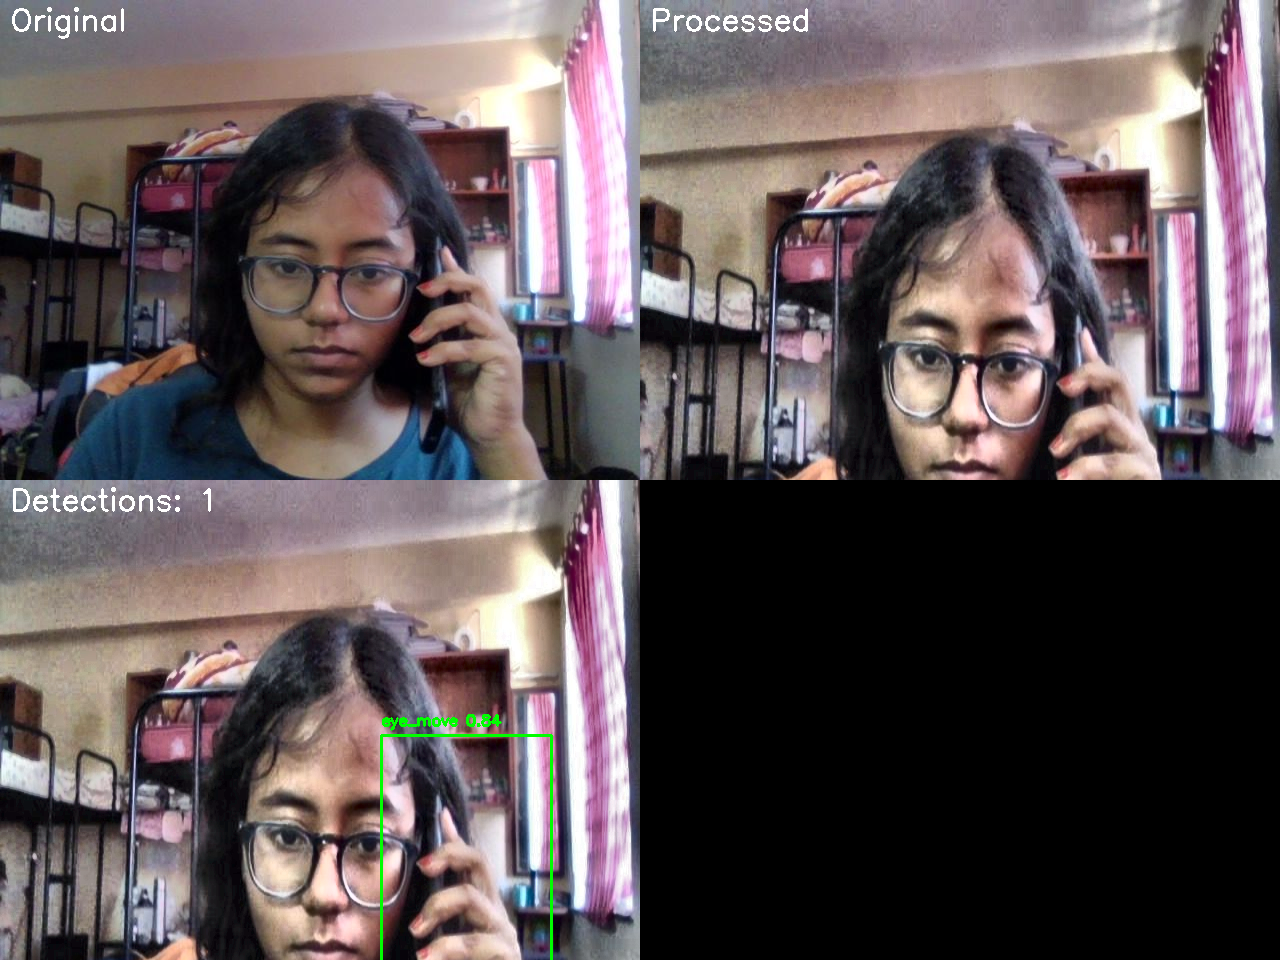


Processed frame with 1 detections
Click 'Capture' for next frame or interrupt kernel to stop


<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode
import numpy as np
import PIL
import io
import html
import time

def js_to_image(js_reply):
    """Convert JS image data to OpenCV image"""
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def preprocess_frame(frame):
    """Apply various preprocessing steps"""
    # Resize to model's training size
    frame_resized = cv2.resize(frame, (640, 640))

    # Enhance contrast
    lab = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    enhanced = cv2.merge((cl,a,b))
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

    # Normalize
    normalized = cv2.normalize(enhanced, None, 0, 255, cv2.NORM_MINMAX)

    return normalized

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    return js_to_image(data)

def run_debug_detection():
    model_path = '/content/drive/MyDrive/models/student_behavior_model2/weights/best.pt'
    print(f"Loading model from: {model_path}")
    model = YOLO(model_path)

    print("\nModel class names:", model.names)
    print("Starting debug detection...")

    try:
        while True:
            # Capture frame
            original_frame = take_photo()

            # Create a copy for preprocessing
            processed_frame = preprocess_frame(original_frame.copy())

            # Run detection with very low confidence
            results = model(processed_frame, conf=0.1)  # Extremely low confidence for debugging

            # Create a visualization with both original and processed frames
            h, w = original_frame.shape[:2]
            debug_frame = np.zeros((h * 2, w * 2, 3), dtype=np.uint8)

            # Place frames in grid
            debug_frame[:h, :w] = original_frame  # Top-left: original
            debug_frame[:h, w:] = processed_frame[:h, :w]  # Top-right: processed

            # Add text labels
            cv2.putText(debug_frame, "Original", (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(debug_frame, "Processed", (w + 10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            # Draw detections on bottom half
            detection_frame = processed_frame.copy()

            detection_count = 0
            for r in results:
                boxes = r.boxes
                for box in boxes:
                    detection_count += 1
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cls = int(box.cls[0])
                    conf = float(box.conf[0])
                    class_name = model.names[cls]

                    cv2.rectangle(detection_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    label = f'{class_name} {conf:.2f}'
                    cv2.putText(detection_frame, label, (x1, y1-10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            debug_frame[h:, :w] = detection_frame[:h, :w]  # Bottom-left: detections

            # Add detection info
            cv2.putText(debug_frame, f"Detections: {detection_count}", (10, h + 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            # Display the debug frame
            clear_output(wait=True)
            cv2_imshow(debug_frame)

            print(f"\nProcessed frame with {detection_count} detections")
            print("Click 'Capture' for next frame or interrupt kernel to stop")

    except KeyboardInterrupt:
        print("\nDetection stopped by user")
    except Exception as e:
        print(f"Error occurred: {str(e)}")

if __name__ == "__main__":
    run_debug_detection()

# Student Online Behavior Classification with Vision Transformer (ViT)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configuration for CPU-friendly training
IMG_SIZE = 128  # Reduced from 224 to speed up training
BATCH_SIZE = 32  # Reduced batch size for CPU
EPOCHS = 15      # Reduced epochs
SAMPLE_SIZE = 1000  # Only use 1000 images for training (adjust as needed)
TEST_SIZE = 81   # Using all test images

## Loading the Yolo Dataset and formating it

In [ ]:
def load_yolo_dataset(data_dir, class_names, sample_size=None):
    """
    Load YOLO format dataset with reduced samples for CPU training.
    Returns image paths and labels.
    """
    images_dir = os.path.join(data_dir, 'images')
    labels_dir = os.path.join(data_dir, 'labels')

    image_paths = []
    labels = []

    all_images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Use subset if sample_size specified
    if sample_size and sample_size < len(all_images):
        all_images = np.random.choice(all_images, size=sample_size, replace=False)

    for img_file in all_images:
        label_file = img_file.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(labels_dir, label_file)

        if not os.path.exists(label_path):
            continue

        with open(label_path, 'r') as f:
            first_line = f.readline()
            if first_line:
                class_id = int(first_line.strip().split()[0])
                image_paths.append(os.path.join(images_dir, img_file))
                labels.append(class_id)

    return np.array(image_paths, dtype=str), np.array(labels, dtype=np.int32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_data_dir = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid"
class_names = ['eye_move', 'looking_side', 'hand_move', 'mobile_use', 'mouth_open']

test_images_dir = os.path.join(test_data_dir, 'images')
test_labels_dir = os.path.join(test_data_dir, 'labels')

all_test_images = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"Found {len(all_test_images)} test images")

for img_file in all_test_images[:5]:  # Check first 5
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(test_labels_dir, label_file)
    print(f"Checking label: {label_path}")

    if not os.path.exists(label_path):
        print(f"❌ Label file missing for {img_file}")
    else:
        with open(label_path, 'r') as f:
            first_line = f.readline().strip()
            print(f"✅ Found label line: {first_line}" if first_line else f"⚠️ Empty label file: {label_file}")


Found 1099 test images
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels/12 0235.txt
✅ Found label line: 0 0.461149 0.464527 0.273649 0.119932
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels/12 0547.txt
✅ Found label line: 0 0.499155 0.478885 0.309122 0.108108
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels/11 757.txt
✅ Found label line: 4 0.463722 0.533123 0.151420 0.126183
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels/12 0551.txt
✅ Found label line: 0 0.487331 0.484797 0.282095 0.130068
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid/labels/12 0069.txt
✅ Found label line: 0 0.466216 0.451014 0.277027 0.092905


In [ ]:
test_data_dir = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test"
class_names = ['eye_move', 'looking_side', 'hand_move', 'mobile_use', 'mouth_open']

test_images_dir = os.path.join(test_data_dir, 'images')
test_labels_dir = os.path.join(test_data_dir, 'labels')

all_test_images = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"Found {len(all_test_images)} test images")

for img_file in all_test_images[:5]:  # Check first 5
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(test_labels_dir, label_file)
    print(f"Checking label: {label_path}")

    if not os.path.exists(label_path):
        print(f"❌ Label file missing for {img_file}")
    else:
        with open(label_path, 'r') as f:
            first_line = f.readline().strip()
            print(f"✅ Found label line: {first_line}" if first_line else f"⚠️ Empty label file: {label_file}")


Found 81 test images
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels/augaug12 354.txt
❌ Label file missing for augaug12 354.jpg
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels/augaugg_5 024.txt
❌ Label file missing for augaugg_5 024.jpg
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels/12 0011.txt
❌ Label file missing for 12 0011.jpg
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels/augaugg_5 329.txt
❌ Label file missing for augaugg_5 329.jpg
Checking label: /content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test/labels/augaugg_8 049.txt
❌ Label file missing for augaugg_8 049.jpg


In [ ]:
# Load data (replace with your actual path)
train_data_dir = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/train"
test_data_dir = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/test"
class_names = ['eye_move', 'looking_side', 'hand_move', 'mobile_use', 'mouth_open']

# Load data
train_paths, train_labels = load_yolo_dataset(train_data_dir, class_names, sample_size=SAMPLE_SIZE)
test_paths, test_labels = load_yolo_dataset(test_data_dir, class_names, sample_size=TEST_SIZE)



print(f"Training samples: {len(train_paths)}")
print(f"Test samples: {len(test_paths)}")

Training samples: 1000
Test samples: 0


In [ ]:
test_data_dir = "/content/drive/MyDrive/data/DataMining/dataset_Students_Behavior_Online_Exam_org/valid"
test_paths, test_labels = load_yolo_dataset(test_data_dir, class_names, sample_size=TEST_SIZE)
print(f"Test samples: {len(test_paths)}")

Test samples: 81


## Preprocessing Dataset

In [ ]:
def preprocess_image(image_path, label):
    """Load and preprocess a single image"""
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.keras.applications.imagenet_utils.preprocess_input(image)
    return image, label

def create_dataset(image_paths, labels, batch_size=32, shuffle=False):
    """Create optimized TensorFlow dataset"""
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(image_paths))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [ ]:
# Create datasets
train_ds = create_dataset(train_paths, train_labels, BATCH_SIZE, shuffle=True)
test_ds = create_dataset(test_paths, test_labels, BATCH_SIZE)

## Vit Modal Design

In [ ]:
def create_lightweight_vit(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=5):
    """Create a CPU-friendly small Vision Transformer"""
    # Parameters
    patch_size = 16
    num_patches = (input_shape[0] // patch_size) ** 2
    projection_dim = 32  # Reduced from typical 64/128 for CPU efficiency
    num_heads = 2        # Reduced attention heads
    transformer_layers = 4  # Reduced from 6-8

    # Inputs
    inputs = layers.Input(shape=input_shape)

    # Create patches
    patches = layers.Conv2D(
        filters=projection_dim,
        kernel_size=patch_size,
        strides=patch_size,
        padding='valid'
    )(inputs)
    patches = layers.Reshape((num_patches, projection_dim))(patches)

    # Learnable position embedding
    positions = tf.range(start=0, limit=num_patches, delta=1)
    position_embedding = layers.Embedding(
        input_dim=num_patches, output_dim=projection_dim
    )(positions)
    encoded = patches + position_embedding

    # Transformer blocks
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded)

        # Multi-head attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim//num_heads
        )(x1, x1)

        # Skip connection 1
        x2 = layers.Add()([attention_output, encoded])

        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        # MLP
        x3 = layers.Dense(projection_dim * 2, activation='gelu')(x3)
        x3 = layers.Dense(projection_dim)(x3)

        # Skip connection 2
        encoded = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded)
    representation = layers.GlobalAveragePooling1D()(representation)
    outputs = layers.Dense(num_classes, activation='softmax')(representation)

    return keras.Model(inputs=inputs, outputs=outputs)

# Create and compile model
vit_model = create_lightweight_vit()
vit_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

vit_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 8, 8, 32)       │         24,608 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 64, 32)         │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 32)         │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 64, 32)         │             64 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 64, 32)         │          4,224 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 64, 32)         │              0 │ multi_head_attention[… │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 64, 32)         │             64 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64, 64)         │          2,112 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64, 32)         │          2,080 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 64, 32)         │              0 │ dense_1[0][0],         │
│                           │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 64, 32)         │             64 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 64, 32)         │          4,224 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 64, 32)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 64, 32)         │             64 │ add_3[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 59,013 (230.52 KB)

 Trainable params: 59,013 (230.52 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [ ]:
# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
]

# Train the model
history = vit_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)
print(history.history.keys())


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7005 - loss: 0.9599 - val_accuracy: 0.6420 - val_loss: 0.9951 - learning_rate: 3.0000e-04
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 163ms/step - accuracy: 0.7106 - loss: 0.8971 - val_accuracy: 0.6543 - val_loss: 0.9641 - learning_rate: 3.0000e-04
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.7582 - loss: 0.7911 - val_accuracy: 0.6543 - val_loss: 1.0453 - learning_rate: 3.0000e-04
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.7696 - loss: 0.7883 - val_accuracy: 0.6790 - val_loss: 0.9131 - learning_rate: 3.0000e-04
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8008 - loss: 0.7274 - val_accuracy: 0.6790 - val_loss: 0.8876 - learning_rate: 3.0000e-04
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.8182 - loss: 0.6218 - val_accuracy: 0.5926 - val_loss: 0.8854 - learning_rate: 3.0000e-04
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 

## Accuracy and Loss Plot

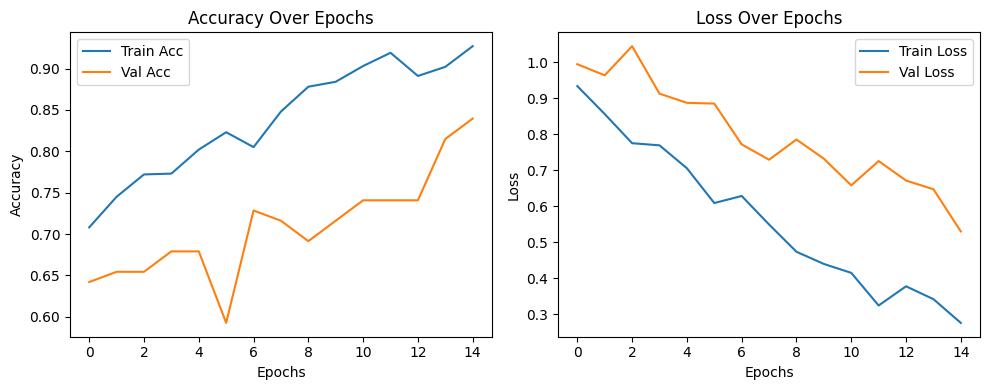

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy increased steadily on both training and validation sets. 💪

Validation loss dropped consistently with occasional fluctuations (normal in training).

Final val_accuracy of 83.95% is a very strong result, indicating good generalization.

No signs of overfitting—training accuracy/loss and val accuracy/loss are tracking closely.

## Testing

In [ ]:
# Evaluate test accuracy
test_loss, test_accuracy = vit_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8338 - loss: 0.5243
Test Accuracy: 0.8395


## Evaluation

In [ ]:
import numpy as np

y_true = []
y_pred_probs = []

# Loop over test dataset
for images, labels in test_ds:
    probs = vit_model.predict(images, verbose=0)
    y_pred_probs.append(probs)
    y_true.append(labels)

# Concatenate all batches
y_true = np.concatenate([y.numpy() for y in y_true])
y_pred_probs = np.concatenate(y_pred_probs)


In [ ]:
from sklearn.preprocessing import label_binarize

n_classes = len(class_names)
y_true_onehot = label_binarize(y_true, classes=np.arange(n_classes))


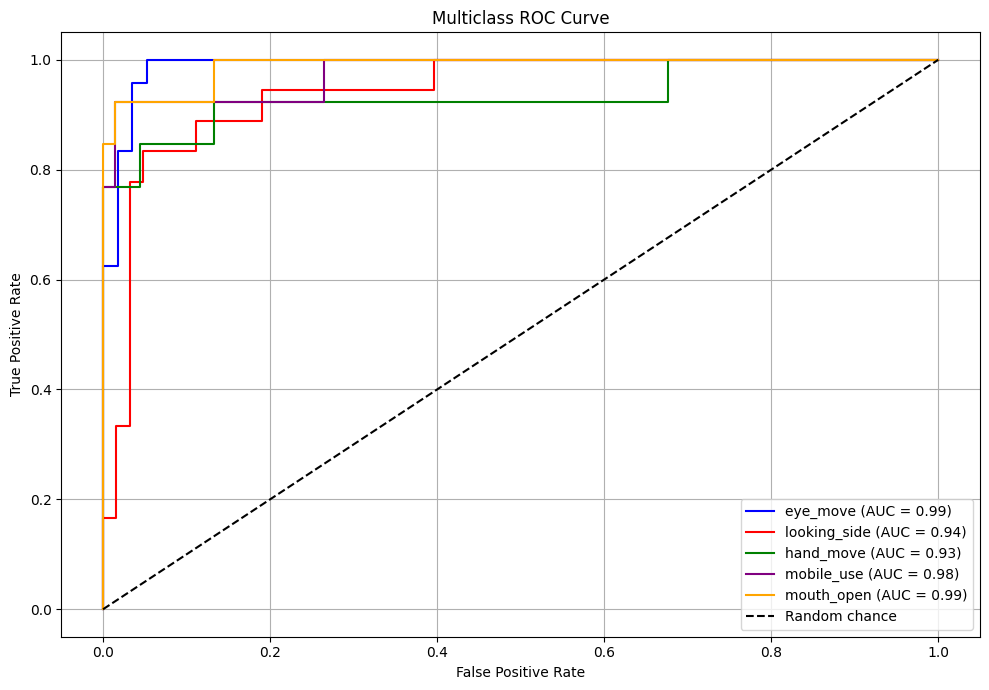

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'purple', 'orange']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

vit_y_pred_labels = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_true, vit_y_pred_labels, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(y_true, vit_y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

    eye_move       0.92      0.92      0.92        24
looking_side       0.87      0.72      0.79        18
   hand_move       1.00      0.69      0.82        13
  mobile_use       0.67      0.92      0.77        13
  mouth_open       0.80      0.92      0.86        13

    accuracy                           0.84        81
   macro avg       0.85      0.84      0.83        81
weighted avg       0.86      0.84      0.84        81

Confusion Matrix:
[[22  0  0  1  1]
 [ 0 13  0  4  1]
 [ 1  1  9  1  1]
 [ 0  1  0 12  0]
 [ 1  0  0  0 12]]


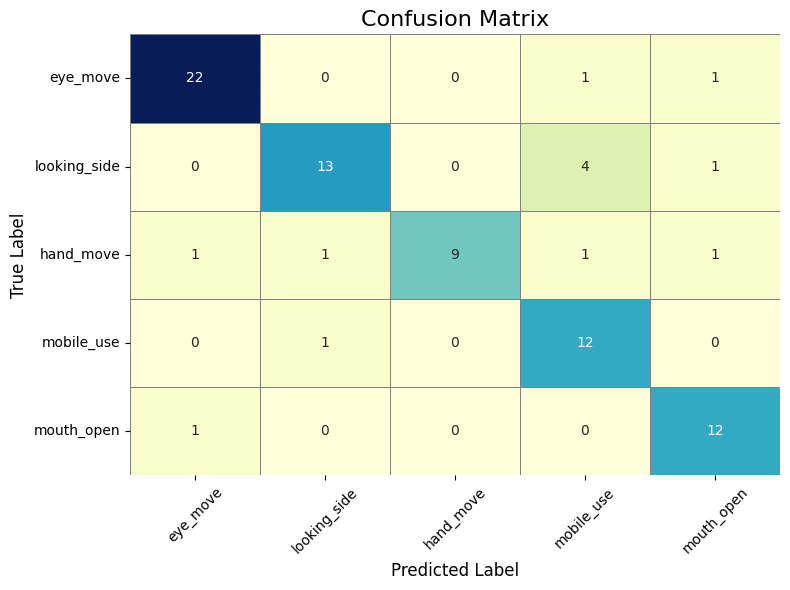

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predicted labels from probabilities
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='gray', cbar=False)

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Using EfficientNetB0 (best balance of size and accuracy)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout



In [ ]:
def create_efficientnet_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=5):
    base_model = EfficientNetB0(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base initially

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

efficientnet_model = create_efficientnet_model()
efficientnet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

efficientnet_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,055,976 (15.47 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Training

In [ ]:
history_efficientnet = efficientnet_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 888ms/step - accuracy: 0.2076 - loss: 1.7278 - val_accuracy: 0.3951 - val_loss: 1.4107 - learning_rate: 3.0000e-04
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.4576 - loss: 1.3556 - val_accuracy: 0.5556 - val_loss: 1.1876 - learning_rate: 3.0000e-04
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.5674 - loss: 1.1520 - val_accuracy: 0.6543 - val_loss: 1.0347 - learning_rate: 3.0000e-04
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.6709 - loss: 1.0161 - val_accuracy: 0.7037 - val_loss: 0.9266 - learning_rate: 3.0000e-04
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.7193 - loss: 0.8964 - val_accuracy: 0.7531 - val_loss: 0.8429 - learning_rate: 3.0000e-04
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.7588 - loss: 0.8137 - val_accuracy: 0.7654 - val_loss: 0.7674 - learning_rate: 3.0000e-04
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy:

##  Testing

In [ ]:
# Evaluate EfficientNet
test_loss_efficientnet, test_acc_efficientnet = efficientnet_model.evaluate(test_ds)
print(f"EfficientNet Test Accuracy: {test_acc_efficientnet:.4f}")

# Predict on test data
y_pred_efficientnet = efficientnet_model.predict(test_ds)
y_pred_labels_efficientnet = np.argmax(y_pred_efficientnet, axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.8562 - loss: 0.4391
EfficientNet Test Accuracy: 0.8765
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step


In [ ]:
def plot_learning_curves(history, title=''):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy', marker='o')
    plt.plot(val_acc, label='Val Accuracy', marker='o')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss', marker='o')
    plt.plot(val_loss, label='Val Loss', marker='o')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()


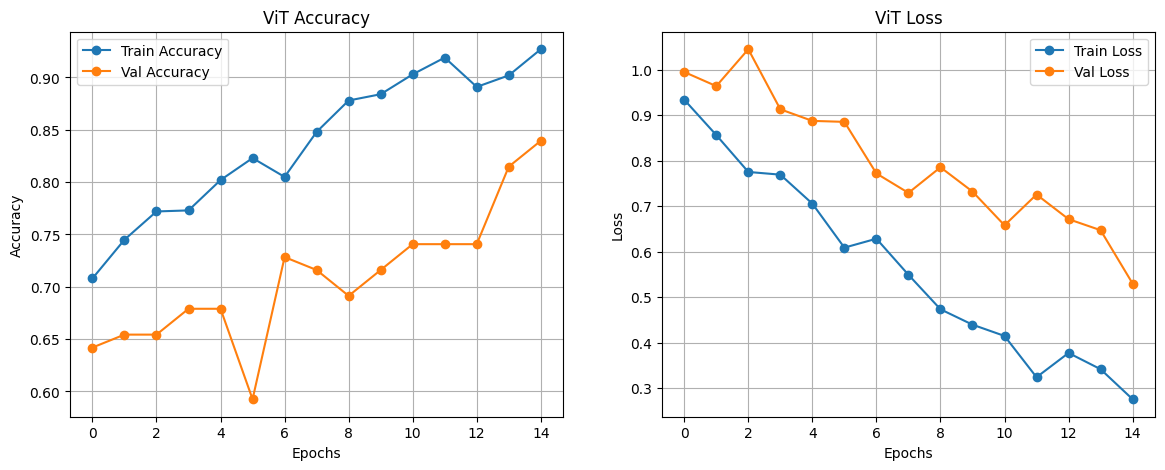

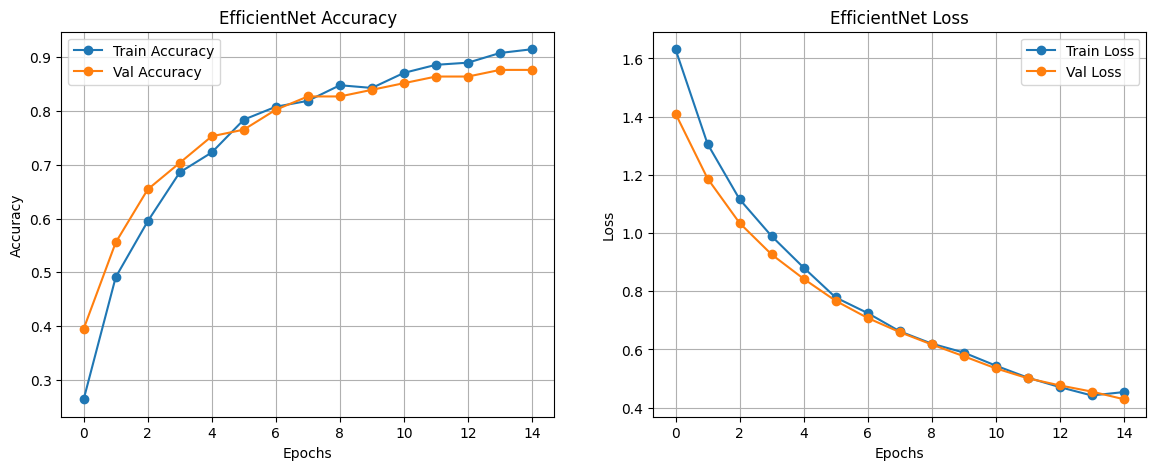

In [ ]:
plot_learning_curves(history, title='ViT')
plot_learning_curves(history_efficientnet, title='EfficientNet')


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


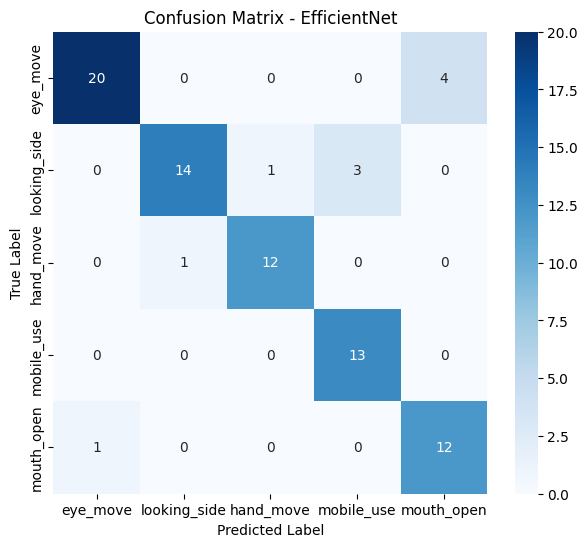

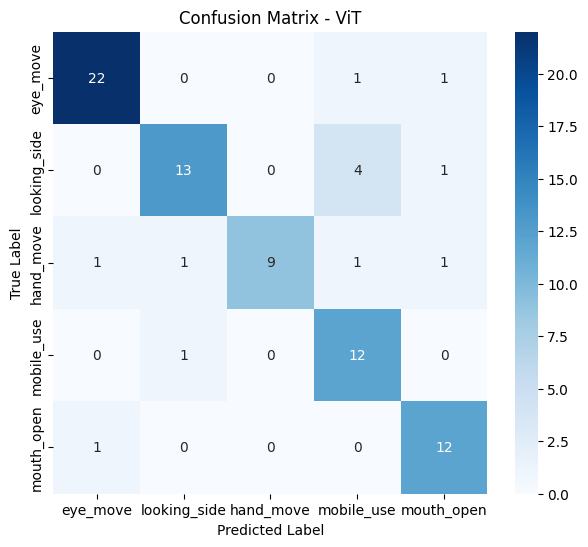

In [ ]:
plot_conf_matrix(test_labels, y_pred_labels_efficientnet, class_names, title="EfficientNet")
plot_conf_matrix(test_labels, vit_y_pred_labels, class_names, title="ViT")


In [ ]:
from sklearn.metrics import classification_report

print("EfficientNet Classification Report:")
print(classification_report(test_labels, y_pred_labels_efficientnet, target_names=class_names))

print("ViT Classification Report:")
print(classification_report(test_labels, vit_y_pred_labels, target_names=class_names))


EfficientNet Classification Report:
              precision    recall  f1-score   support

    eye_move       0.95      0.83      0.89        24
looking_side       0.93      0.78      0.85        18
   hand_move       0.92      0.92      0.92        13
  mobile_use       0.81      1.00      0.90        13
  mouth_open       0.75      0.92      0.83        13

    accuracy                           0.88        81
   macro avg       0.87      0.89      0.88        81
weighted avg       0.89      0.88      0.88        81

ViT Classification Report:
              precision    recall  f1-score   support

    eye_move       0.92      0.92      0.92        24
looking_side       0.87      0.72      0.79        18
   hand_move       1.00      0.69      0.82        13
  mobile_use       0.67      0.92      0.77        13
  mouth_open       0.80      0.92      0.86        13

    accuracy                           0.84        81
   macro avg       0.85      0.84      0.83        81
weighted avg  

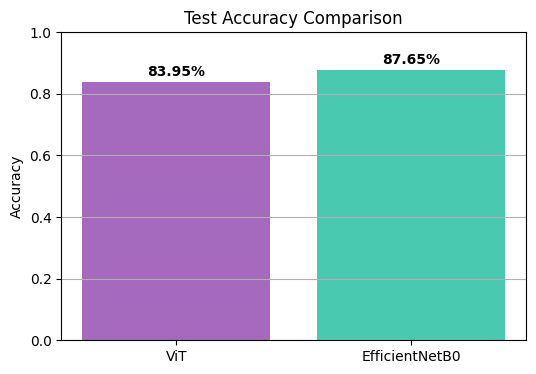

In [ ]:
models = ['ViT', 'EfficientNetB0']
accuracies = [test_accuracy, test_acc_efficientnet]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['#A569BD', '#48C9B0'])
plt.title('Test Accuracy Comparison')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.grid(True, axis='y')
plt.show()
